In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
AA_EN_0_5L= pd.read_csv('/content/api_data_aadhar_enrolment_0_500000.csv')
AA_EN_5L_10L= pd.read_csv('/content/api_data_aadhar_enrolment_500000_1000000.csv')
AA_EN_10L = pd.read_csv('/content/api_data_aadhar_enrolment_1000000_1006029.csv')

In [ ]:
total = pd.concat([AA_EN_0_5L,AA_EN_5L_10L,AA_EN_10L],ignore_index=True)
total.shape

(1006029, 7)

In [ ]:
total.head(15)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
5,09-03-2025,Bihar,Sitamarhi,843331,20,49,12
6,09-03-2025,Bihar,Sitamarhi,843330,23,24,42
7,09-03-2025,Uttar Pradesh,Bahraich,271865,26,60,14
8,09-03-2025,Uttar Pradesh,Firozabad,283204,28,26,10
9,09-03-2025,Bihar,Purbi Champaran,845418,30,48,10


In [ ]:
total.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [ ]:
total.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS**

In [ ]:
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [ ]:
summary = column_summary(total)
print(summary)

         col_name col_dtype  num_of_nulls  num_of_non_nulls  \
0            date    object             0           1006029   
1           state    object             0           1006029   
2        district    object             0           1006029   
3         pincode     int64             0           1006029   
4         age_0_5     int64             0           1006029   
5        age_5_17     int64             0           1006029   
6  age_18_greater     int64             0           1006029   

   num_of_distinct_values                             distinct_values_counts  
0                      92  {'15-12-2025': 19426, '30-10-2025': 19010, '15...  
1                      55  {'Uttar Pradesh': 110369, 'Tamil Nadu': 92552,...  
2                     985  {'Pune': 6663, 'North 24 Parganas': 6488, 'Bar...  
3                   19463  {500055: 274, 500018: 267, 500005: 247, 110053...  
4                     671  {1: 376123, 2: 179930, 0: 115243, 3: 101655, 4...  
5                    

In [ ]:
total['date'] = pd.to_datetime(total['date'],format='%d-%m-%Y',errors='coerce')
total['total_enrollment'] = total['age_0_5']+total['age_5_17']+total['age_18_greater']

**DATA CLEANING AND PRE PROCESSING**

In [ ]:
state_summary = total.groupby('state').agg({
    'total_enrollment': 'sum',
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum',
    'pincode': 'nunique'
}).sort_values(by='total_enrollment', ascending=False)
state_summary.columns = ['Total Enrollment', 'Age 0-5', 'Age 5-17', 'Age 18+', 'Unique Pincodes']
print(state_summary)

                                              Total Enrollment  Age 0-5  \
state                                                                     
Uttar Pradesh                                          1018629   521045   
Bihar                                                   609585   262875   
Madhya Pradesh                                          493970   367990   
West Bengal                                             375297   275391   
Maharashtra                                             369139   278814   
Rajasthan                                               348458   229780   
Gujarat                                                 280549   193031   
Assam                                                   230197   141235   
Karnataka                                               223235   179262   
Tamil Nadu                                              220789   182313   
Jharkhand                                               157539    98551   
Telangana                

In [ ]:
def standardize_text(s,mapping_dict=None):
  if pd.isnull(s):
    return s
  val = str(s).strip().title()
  if mapping_dict and val in mapping_dict:
    return mapping_dict[val]
  return val



1.   We found that some states have different name and also with some spelling mistake so we created a dictionary to map the worng or misspelled state to it's original states


In [ ]:
state_alias = {
    # West Bengal
    'westbengal' : 'West Bengal',
    'west bengal' : 'West Bengal',
    'West Bangal' : 'West Bengal',
    'West Bengal' : 'West Bengal',
    'WESTBENGAL' : 'West Bengal',
    'Westbengal' : 'West Bengal',
    'West  Bengal' : 'West Bengal',

    # Jammu and Kashmir
    'jammu and kashmir' : 'Jammu and Kashmir',
    'Jammu & Kashmir' : 'Jammu and Kashmir',
    'Jammu And Kashmir' : 'Jammu and Kashmir',

    #Odisha/Orissa
    'orissa' : 'Odisha',
    'Orissa' : 'Odisha',
    'ORISSA' : 'Odisha',

    # Andhra Pradesh
    'Andhra Pradesh' : 'Andhra Pradesh',
    'Andhra pradesh' : 'Andhra Pradesh',
    'andhra pradesh' : 'Andhra Pradesh',

    # Dadra & Nagar Haveli and Daman & Diu
    'Dadra And Nagar Haveli' : 'The Dadra And Nagar Haveli And Daman And Diu',
    'Daman And Diu' : 'The Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli And Daman & Diu' : 'The Dadra And Nagar Haveli And Daman And Diu',
    'The Dadra and Nagar Haveli and Daman And Diu' : 'The Dadra And Nagar Haveli And Daman And Diu',
    'Dadra & Nagar Haveli' : 'The Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli And Daman And Diu' : 'The Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu' : 'The Dadra And Nagar Haveli And Daman And Diu',

    #Pondicherry
    'Pondicherry' : 'Puducherry',
    'Puducherry' : 'Puducherry',
    'puducherry' : 'Puducherry',
    'Pondicherry' : 'Puducherry',

    #Chandigarh
    'Chandigarh' : 'Chandigarh',

    #Andaman & Nicobar Islands
    'andaman and nicobar islands' : 'Andaman And Nicobar Islands',
    'Andaman & Nicobar Islands' : 'Andaman And Nicobar Islands',
}

In [ ]:
total['state'] = total['state'].apply(lambda x: standardize_text(x,state_alias))
total['pincode'] = pd.to_numeric(total['pincode'],errors='coerce')

In [ ]:
total['state'].nunique()

37

In [ ]:
# Placeholder values: identify and flag geographic invalids
placeholder = 100000
total['invalid_geo'] = (
    (total['state'].astype(str).str.isnumeric()) |
    (total['district'].astype(str).str.isnumeric()) |
    (total['pincode'] == placeholder)
)

In [ ]:
#create derived features
total['month'] = total['date'].dt.month
total['year'] = total['date'].dt.year

In [ ]:
#count and preview of invalid geo
invalid_geo_count = total['invalid_geo'].sum()
print(f"Invali geo flagged: {invalid_geo_count}")
print(total[total['invalid_geo']].head(5))

Invali geo flagged: 22
             date   state district  pincode  age_0_5  age_5_17  \
23108  2025-09-02  100000   100000   100000        0         0   
46946  2025-09-03  100000   100000   100000        0         0   
97816  2025-09-08  100000   100000   100000        0         0   
115798 2025-09-09  100000   100000   100000        0         0   
153156 2025-09-11  100000   100000   100000        0         0   

        age_18_greater  total_enrollment  invalid_geo  month  year  
23108                3                 3         True      9  2025  
46946                1                 1         True      9  2025  
97816                1                 1         True      9  2025  
115798               1                 1         True      9  2025  
153156               2                 2         True      9  2025  


In [ ]:
# Normal (valid-geo) preview
print(f"PREVIEW: Valid geo records remaining: {(~total['invalid_geo']).sum()}")
print(total[~total['invalid_geo']].head(5))

PREVIEW: Valid geo records remaining: 1006007
        date          state          district  pincode  age_0_5  age_5_17  \
0 2025-03-02      Meghalaya  East Khasi Hills   793121       11        61   
1 2025-03-09      Karnataka   Bengaluru Urban   560043       14        33   
2 2025-03-09  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3 2025-03-09  Uttar Pradesh           Aligarh   202133       62        29   
4 2025-03-09      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  total_enrollment  invalid_geo  month  year  
0              37               109        False      3  2025  
1              39                86        False      3  2025  
2              12               123        False      3  2025  
3              15               106        False      3  2025  
4              21                51        False      3  2025  


In [ ]:
# Show top unique states and districts after cleaning
print("PREVIEW: Top 20 unique states:")
print(total['state'].dropna().unique()[:20])
print("PREVIEW: Top 20 unique districts:")
print(total['district'].dropna().unique()[:20])
# Columns
print("PREVIEW: Cleaned DataFrame columns:")
print(total.columns.tolist())

PREVIEW: Top 20 unique states:
['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur']
PREVIEW: Top 20 unique districts:
['East Khasi Hills' 'Bengaluru Urban' 'Kanpur Nagar' 'Aligarh' 'Sitamarhi'
 'Bahraich' 'Firozabad' 'Purbi Champaran' 'Maharajganj' 'Aurangabad'
 'Ghaziabad' 'Faridabad' 'Madhubani' 'Sikar' 'Bhagalpur' 'Amritsar'
 'Gurugram' 'Gautam Buddha Nagar' 'West Delhi' 'Bhind']
PREVIEW: Cleaned DataFrame columns:
['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater', 'total_enrollment', 'invalid_geo', 'month', 'year']


# **UNIVARIATE ANALYSIS**

In [ ]:
print("THE TOTAL NUMBER OF ENROLLMENTS IN ALL STATES : ",total['total_enrollment'].sum())
print("ENROLMENTS UNDER THE AGE GROUP 0 TO 5 : ",total['age_0_5'].sum())
print("ENROLMENTS UNDER THE AGE GROUP 5 TO 17 : ",total['age_5_17'].sum())
print("ENROLMENTS IN THE AGE CATEGORY 18 AND ABOVE : ",total['age_18_greater'].sum())

THE TOTAL NUMBER OF ENROLLMENTS IN ALL STATES :  5435702
ENROLMENTS UNDER THE AGE GROUP 0 TO 5 :  3546965
ENROLMENTS UNDER THE AGE GROUP 5 TO 17 :  1720384
ENROLMENTS IN THE AGE CATEGORY 18 AND ABOVE :  168353


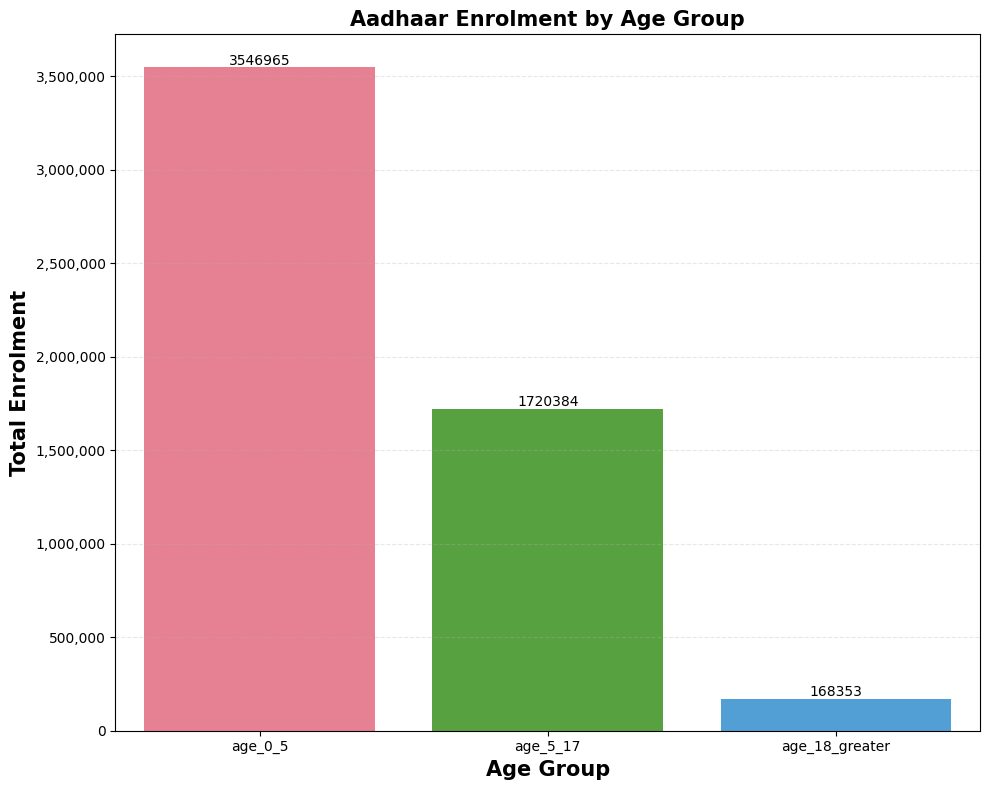

In [ ]:
#Age group enrollment distribution
plt.figure(figsize=(10, 8))
age_cols = ['age_0_5','age_5_17','age_18_greater']
total_age = total[age_cols].sum()
ax = sns.barplot(x=total_age.index,y=total_age.values,palette='husl')
plt.title('Aadhaar Enrolment by Age Group',fontsize=15,weight='bold')
plt.xlabel('Age Group',fontsize=15,weight='bold')
plt.ylabel('Total Enrolment',fontsize=15,weight='bold')
plt.grid(axis='y',linestyle='--',alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.tight_layout()
plt.savefig("UV_analysis_AA_EN_by_age_group",dpi=200, bbox_inches='tight')
plt.show()

## **Aadhaar Enrolments by Age Group(UNIVARIATE)**

---

### **Chart Description :**
*   The bar chart illustrates total Aadhaar enrollmentfor each group : 0-5, 5-17, 18+ years.


---


### **Insights :**

*   The highest number of enrollments is always among 0-5 age group only to indicate that the young children are being hooked on by the newly forced drives and requirements.
* The 5-17 age bracket is high but lower than 0-5 and the bracket 18+ is the least; this may be an indication of an already existing population of adults who already have Aadhaar and that the current single category of people who have not yet received Aadhaar (on age basis or immigration) form a minor proportion.

---


### **Administrative Importance :**
* Maintenance of the Early Childhood Enrollments: Since the enrollment rate in the 0-5 age category is high, the administration should maintain the same and even extend the coverage, which is to provide every born child and the young children with the Aadhaar.
* Targeted Adult Engagement: In the case of adults (18+) this should be changed. Rather than general enrolment campaigns, the administrative policies should focus on:  **Refreshing Existing Data**
*  Marginalized Populations: Reaching out to specific marginalized communities or remote regions where Aadhaar penetration might still be low.
* Migrant Populations: Addressing the unique challenges of enrolling internal and external migrant populations.





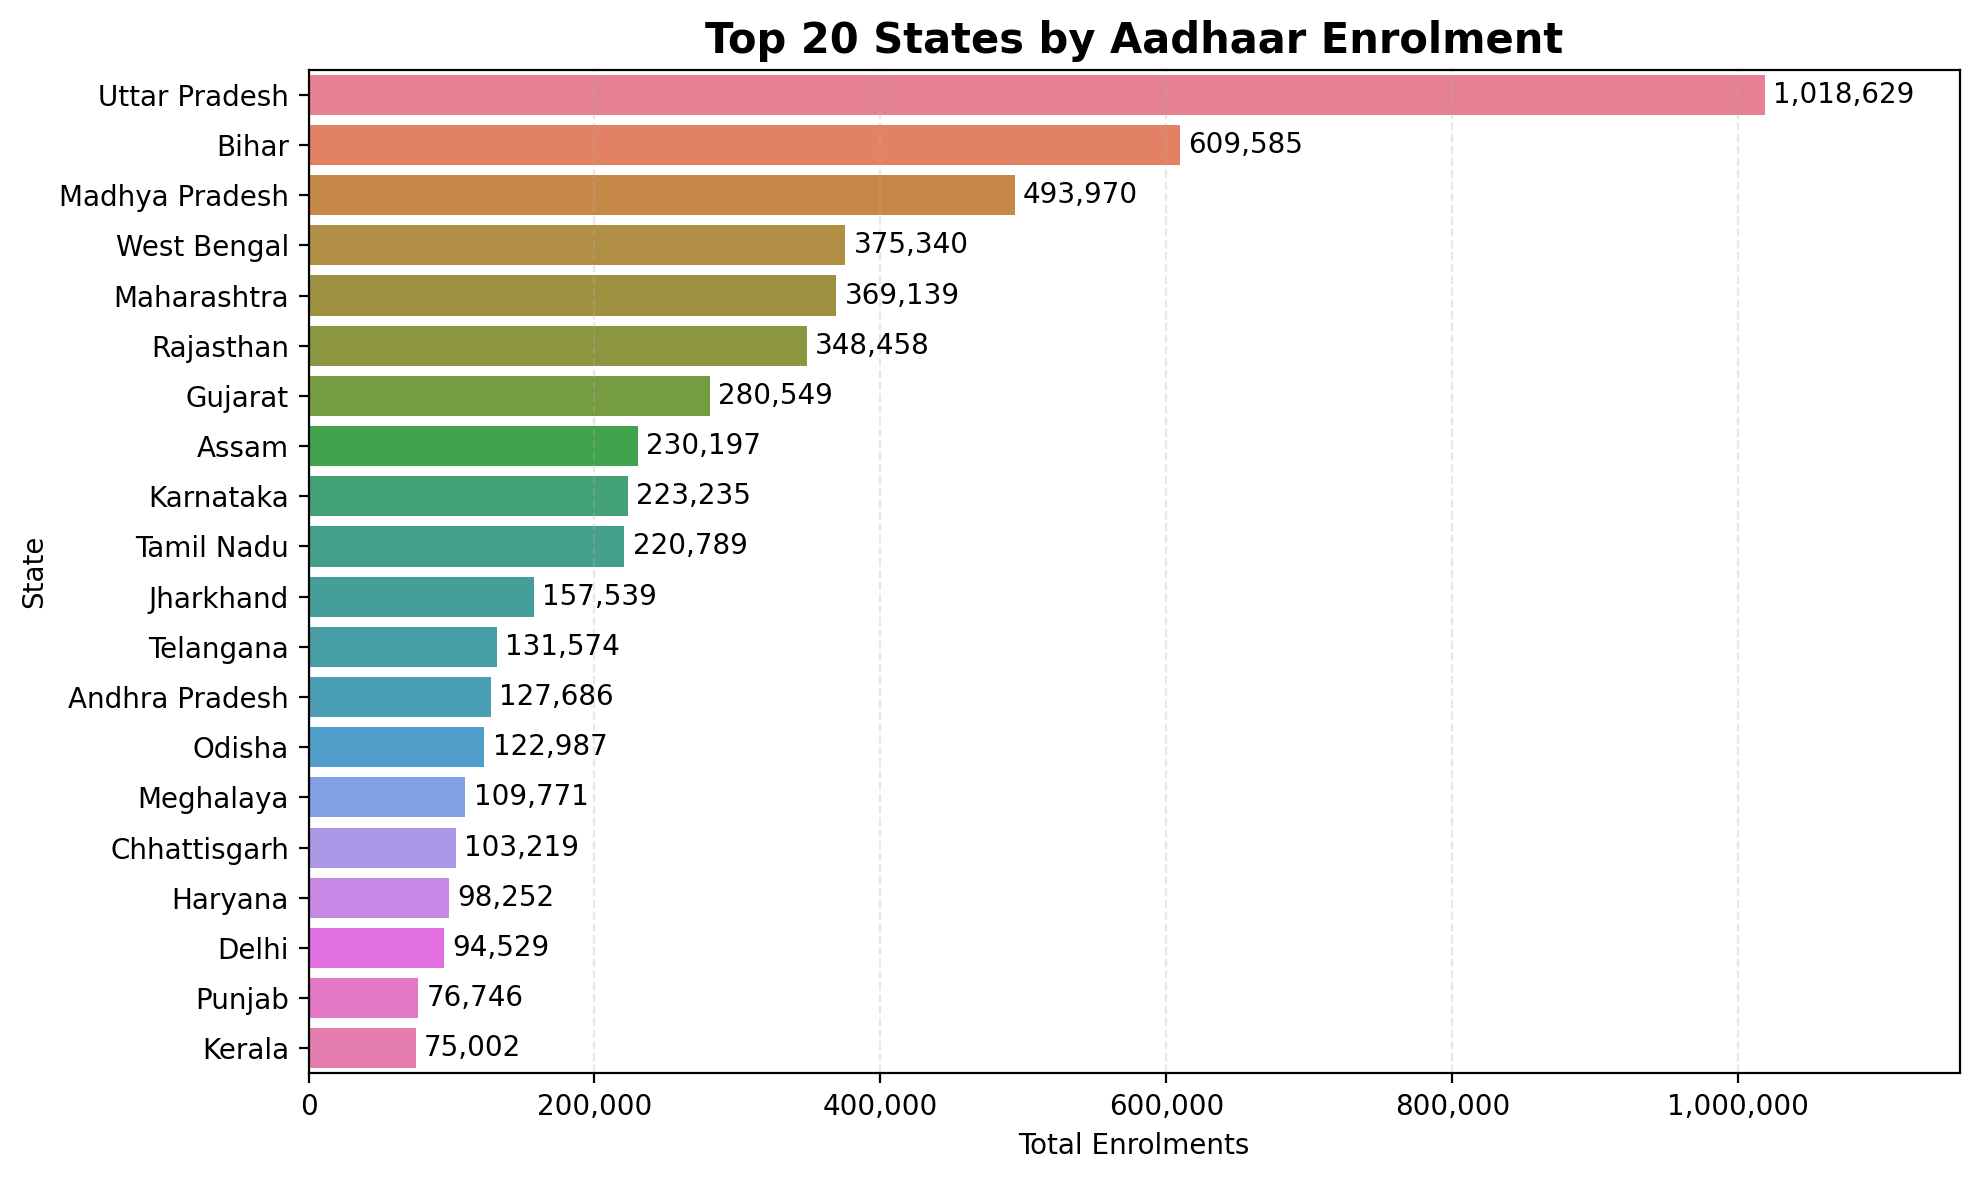

In [ ]:
# 2. State-wise total enrolments (top 15)
plt.figure(figsize=(10,6), dpi=200)
state_group = total.groupby('state')['total_enrollment'].sum().sort_values(ascending=False).head(20)
ax1 = sns.barplot(y=state_group.index, x=state_group.values, palette='husl')
plt.title('Top 20 States by Aadhaar Enrolment', fontsize=15, weight='bold')
plt.xlabel('Total Enrolments')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
for container in ax1.containers:
    ax1.bar_label(
        container,
        fmt='{:,.0f}',
        label_type='edge',
        padding=3
    )
ax1.set_xlim(0, ax1.get_xlim()[1] * 1.08)
plt.tight_layout()
plt.savefig("UV_analysis_top20_states_by_AA_EN", dpi=200, bbox_inches='tight')
plt.show()


## **Top 20 States by Aadhaar Enrolment(UNIVARIATE)**

---


### **Chart Description :**
* The bar chart shows the top 20 states in terms of Aadhaar enrolments

---



### **Insights :**
* Most bulk of the national volume of enrolment goes to the 5 states, which means that the demand in Aadhaar services will experience strong regional imbalance.

* States that are economically developed like Maharashtra, Tamil Nadu and Karnataka experience relatively low levels of enrolment implying that they have higher Aadhaar saturation as opposed to new registrations.

* The states with a heavy migration population (Uttar Pradesh, Bihar, Madhya Pradesh, Rajasthan, West Bengal) have a much greater enrolment activity indicating a regular update of address and demographics.

* Enrolment volumes decline abruptly beyond the top 10 states indicating two definite zones of Aadhaar demand namely high-demand and stable-demand regions.

* The active enrolment persists in smaller and Northeastern states where the population size is smaller, that is, less volume does not imply less need of the service.


---


### **Administrative Importance :**
* Provision distribution of Aadhaar enrolment kits, operators and backend infrastructure according to demand per state rather than randomly.

* Additional capacity in the high volume states such as Uttar Pradesh and Bihar in times of peak enrolment to ease the load on the system and reduce waiting duration.

* Acquire better efficiency in updating services (address and biometric and mobile number updates) in the high-saturation states (Maharashtra, Tamil Nadu, Karnataka).

* Use mobile Aadhaar enrolment unit in the districts with large levels of migration to serve migrant and seasonal populations.

* Adopt state specific Aadhaar service strategies rather than having one national operational model.


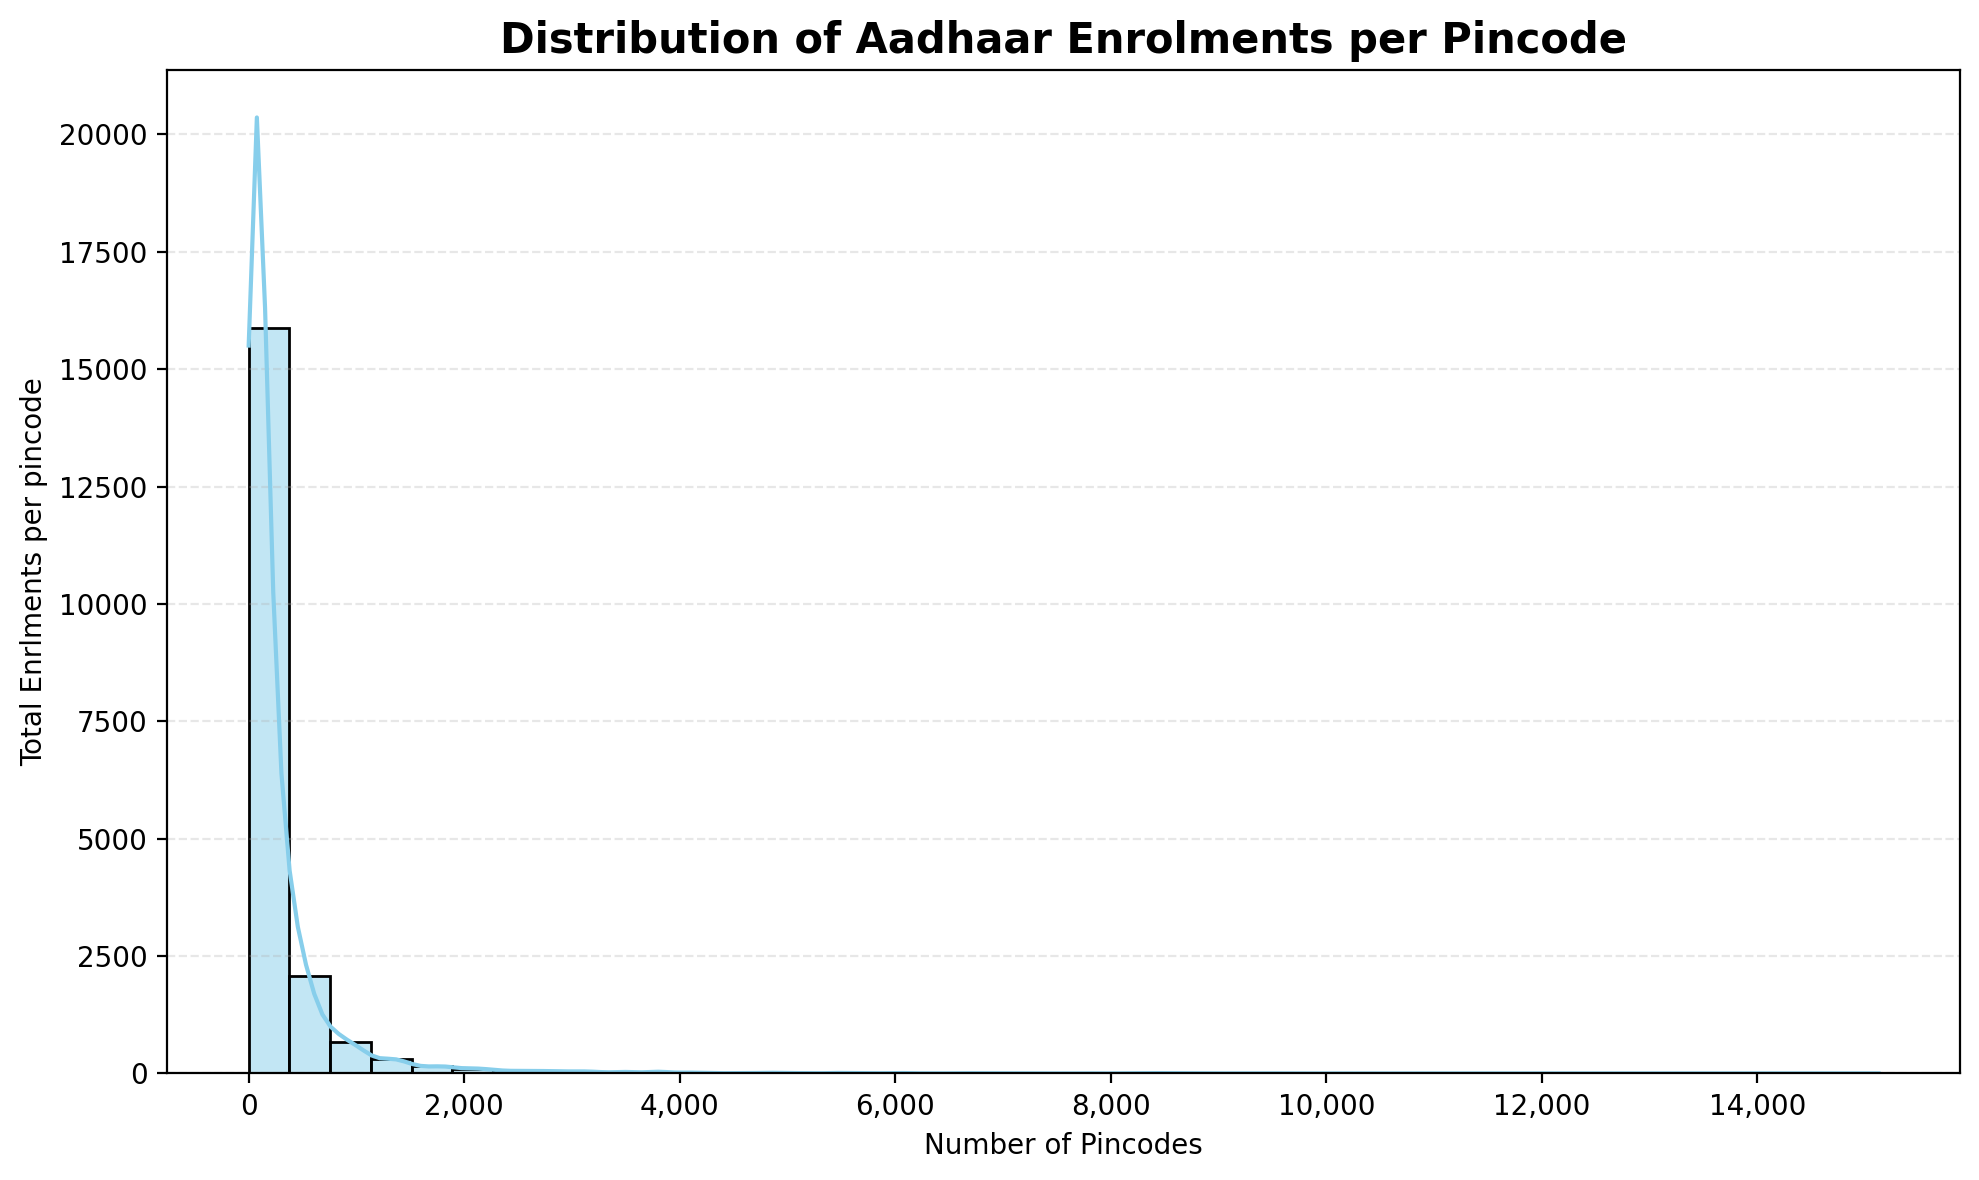

In [ ]:
# Distribution of enrolments per pincode
plt.figure(figsize=(10,6), dpi=200)
pincode_group = total.groupby('pincode')['total_enrollment'].sum().sort_values(ascending=False)
ax2 = sns.histplot(pincode_group,bins=40,kde=True,color='skyblue')
plt.title('Distribution of Aadhaar Enrolments per Pincode', fontsize=15, weight='bold')
plt.xlabel('Number of Pincodes')
plt.ylabel('Total Enrlments per pincode')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('UV_analysis_Distribution_AA_EN_per_pincode')
plt.show()

## **Distribution of Aadhaar Enrolment per Pincode**

---


### **Chart Description:**
* This is a histogram showcasing the number of enrollments per pincode.
### **Insights:**
* Aadhaar enrollment across different pincodes shows a strong right-skewedness.
* This shows that there are only a few pincodes with higher enrollment, and all other pincodes have low enrollment.
* Those high enrollment pincodes may be due to the following reasons
* Highly populated cities
* Migration zones
* Places where aadhaar camps or update drives
* Government Service Centers

---



### **Administrative Importance:**
* The places with higher Aadhaar activity need to be considered, and more infrastructure needs to be provided, and staffing needs to be increased as well.
* Use mobile Aadhaar centers where the volume is medium.
* Avoid wasting resources where the demand is least, and try to allocate resources based on the requirement.

In [ ]:
#Top 20 pincodes where Aadhaar Enrollments are higher
pincode_group.head(20)

,total_enrollment
pincode,
244001,15124
202001,11842
793119,11720
110059,10462
247001,10189
244901,9572
250002,9378
431001,9104
282001,8686


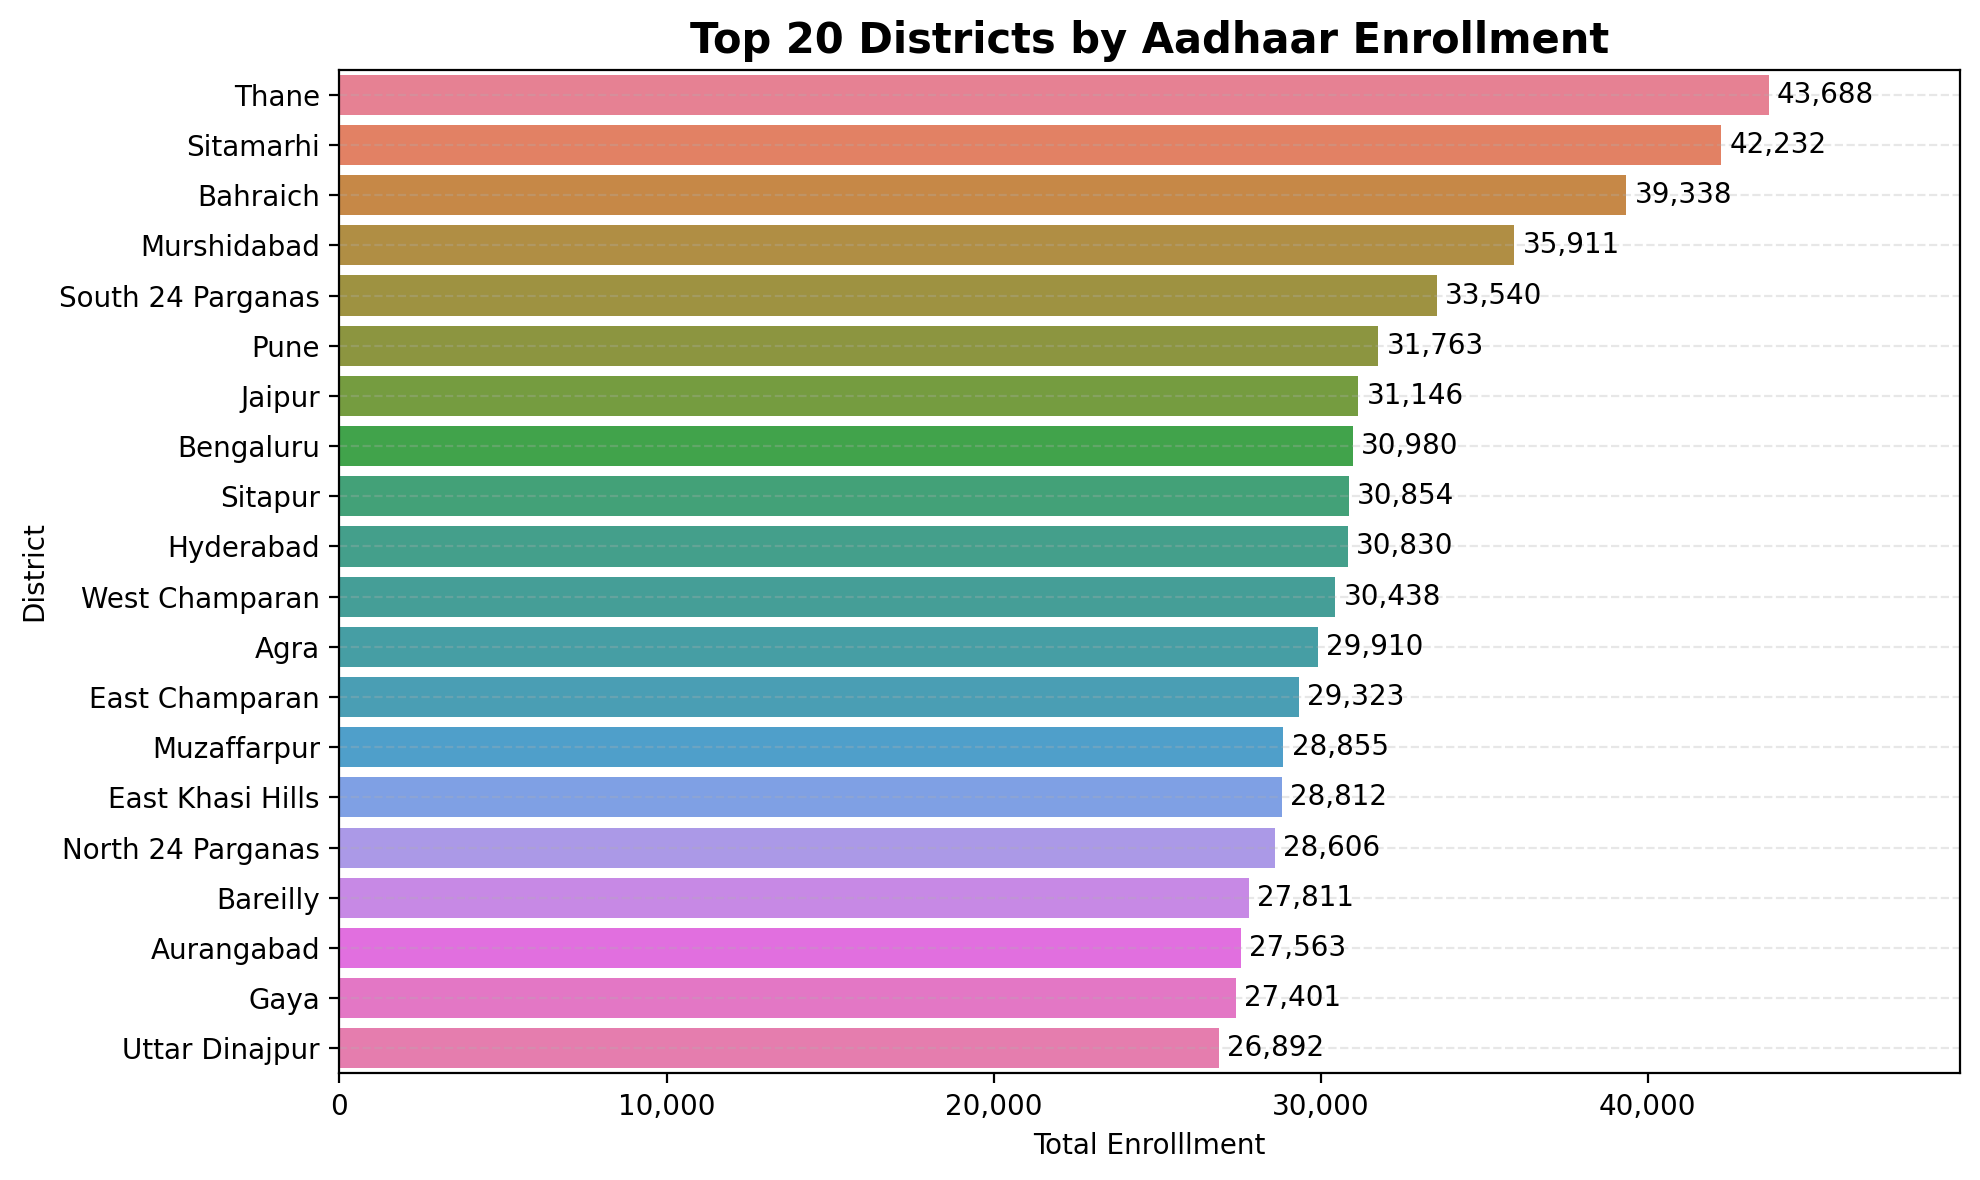

In [ ]:
# District-Wise Total Enrollment Distrubution
top_districts_total = total.groupby('district')['total_enrollment'].sum().sort_values(ascending=False)
top_districts = total.groupby('district')['total_enrollment'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6), dpi=200)
ax3 = sns.barplot(y=top_districts.index, x=top_districts.values, palette='husl')
plt.title("Top 20 Districts by Aadhaar Enrollment",fontsize=15,fontweight='bold')
plt.xlabel('Total Enrolllment')
plt.ylabel('District')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
for container in ax3.containers:
    ax3.bar_label(
        container,
        fmt='{:,.0f}',
        label_type='edge',
        padding=3
    )
ax3.set_xlim(0, ax3.get_xlim()[1] * 1.08)
plt.tight_layout()
plt.savefig('UV_analysis_Top20_districts_by_AA_EN')
plt.show()

## **District-wise Total Enrollment Distribution :**
---
### **Chart Description :**
* This chart shows the top 20 districts with the highest Aadhaar enrolments, highlighting districts that act as major service hotspots.

---


### **INSIGHTS :**
* The level of enrollment in Aadhaar at the district level is extremely high with the highest concentration in such districts as Thane, Sitamarhi, Bahraich, Murshidabad and others.
* The best of these districts are in high-population areas or ones receiving high migrations like Maharashtra, Bihar, Uttar Pradesh, and West Bengal.
* Best enrollments are reported in urban and semi-urban cities (e.g., Thane, Pune, Bengaluru, and Hyderabad) as a result of the population density and regular updates.
* Other rural districts (e.g., Sitamarhi, Bahraich, and Champaran districts) are also very high, meaning that Aadhaar is largely relied on in the welfare schemes.
* The numbers of enrolled decrease in a gradual manner following the front runners with the result that there is an unbalanced distribution of workload amongst the districts.

---


### **ADMINISTRATIVE IMPORTANCE/ACTIONS :**
* Distribution of more enrollment operators and biometric kits to high-enrollment districts should be considered Aadhaar service hotspots areas.
* Frequent Aadhaar updates and corrections should be the priority of urban hotspots districts as it involves rapid and timely dissemination of change.
* Rural high-volume districts must have the additional permanent, enrollment centers to cater the welfare beneficiaries.
* To equalize the workload, the mobile Aadhaar vans can be distributed in the nearby low-capacity districts.

In [ ]:
top_districts_total.head(50)

,total_enrollment
district,
Thane,43688
Sitamarhi,42232
Bahraich,39338
Murshidabad,35911
South 24 Parganas,33540
Pune,31763
Jaipur,31146
Bengaluru,30980
Sitapur,30854


# **BIVARIATE ANALYSIS**

In [ ]:
total_agg_raw = total.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()
total_agg_raw['overall_enrollment'] = total_agg_raw['age_0_5'] + total_agg_raw['age_5_17'] + total_agg_raw['age_18_greater']
total_agg = total_agg_raw.sort_values(by='overall_enrollment', ascending=False).head(20).reset_index()
total_agg_melt = total_agg.melt(id_vars='state',value_vars=['age_0_5','age_5_17','age_18_greater'],var_name='Age Group',value_name='Enrolment')

In [ ]:
state_age_wide = total_agg_melt.pivot(
    index='state',
    columns='Age Group',
    values='Enrolment'
).sort_values(by='age_0_5', ascending=False).head(20).reset_index()
print(state_age_wide)

Age Group           state  age_0_5  age_18_greater  age_5_17
0           Uttar Pradesh   521045           17902    479682
1          Madhya Pradesh   367990            9599    116381
2             Maharashtra   278814            8209     82116
3             West Bengal   275420            8510     91410
4                   Bihar   262875           11908    334802
5               Rajasthan   229780            5555    113123
6                 Gujarat   193031           16336     71182
7              Tamil Nadu   182313            1249     37227
8               Karnataka   179262           10110     33863
9                   Assam   141235           22877     66085
10         Andhra Pradesh   112445            1495     13746
11              Telangana   105918            1151     24505
12                 Odisha    99431             739     22817
13              Jharkhand    98551            1449     57539
14                Haryana    88042            1100      9110
15           Chhattisgar

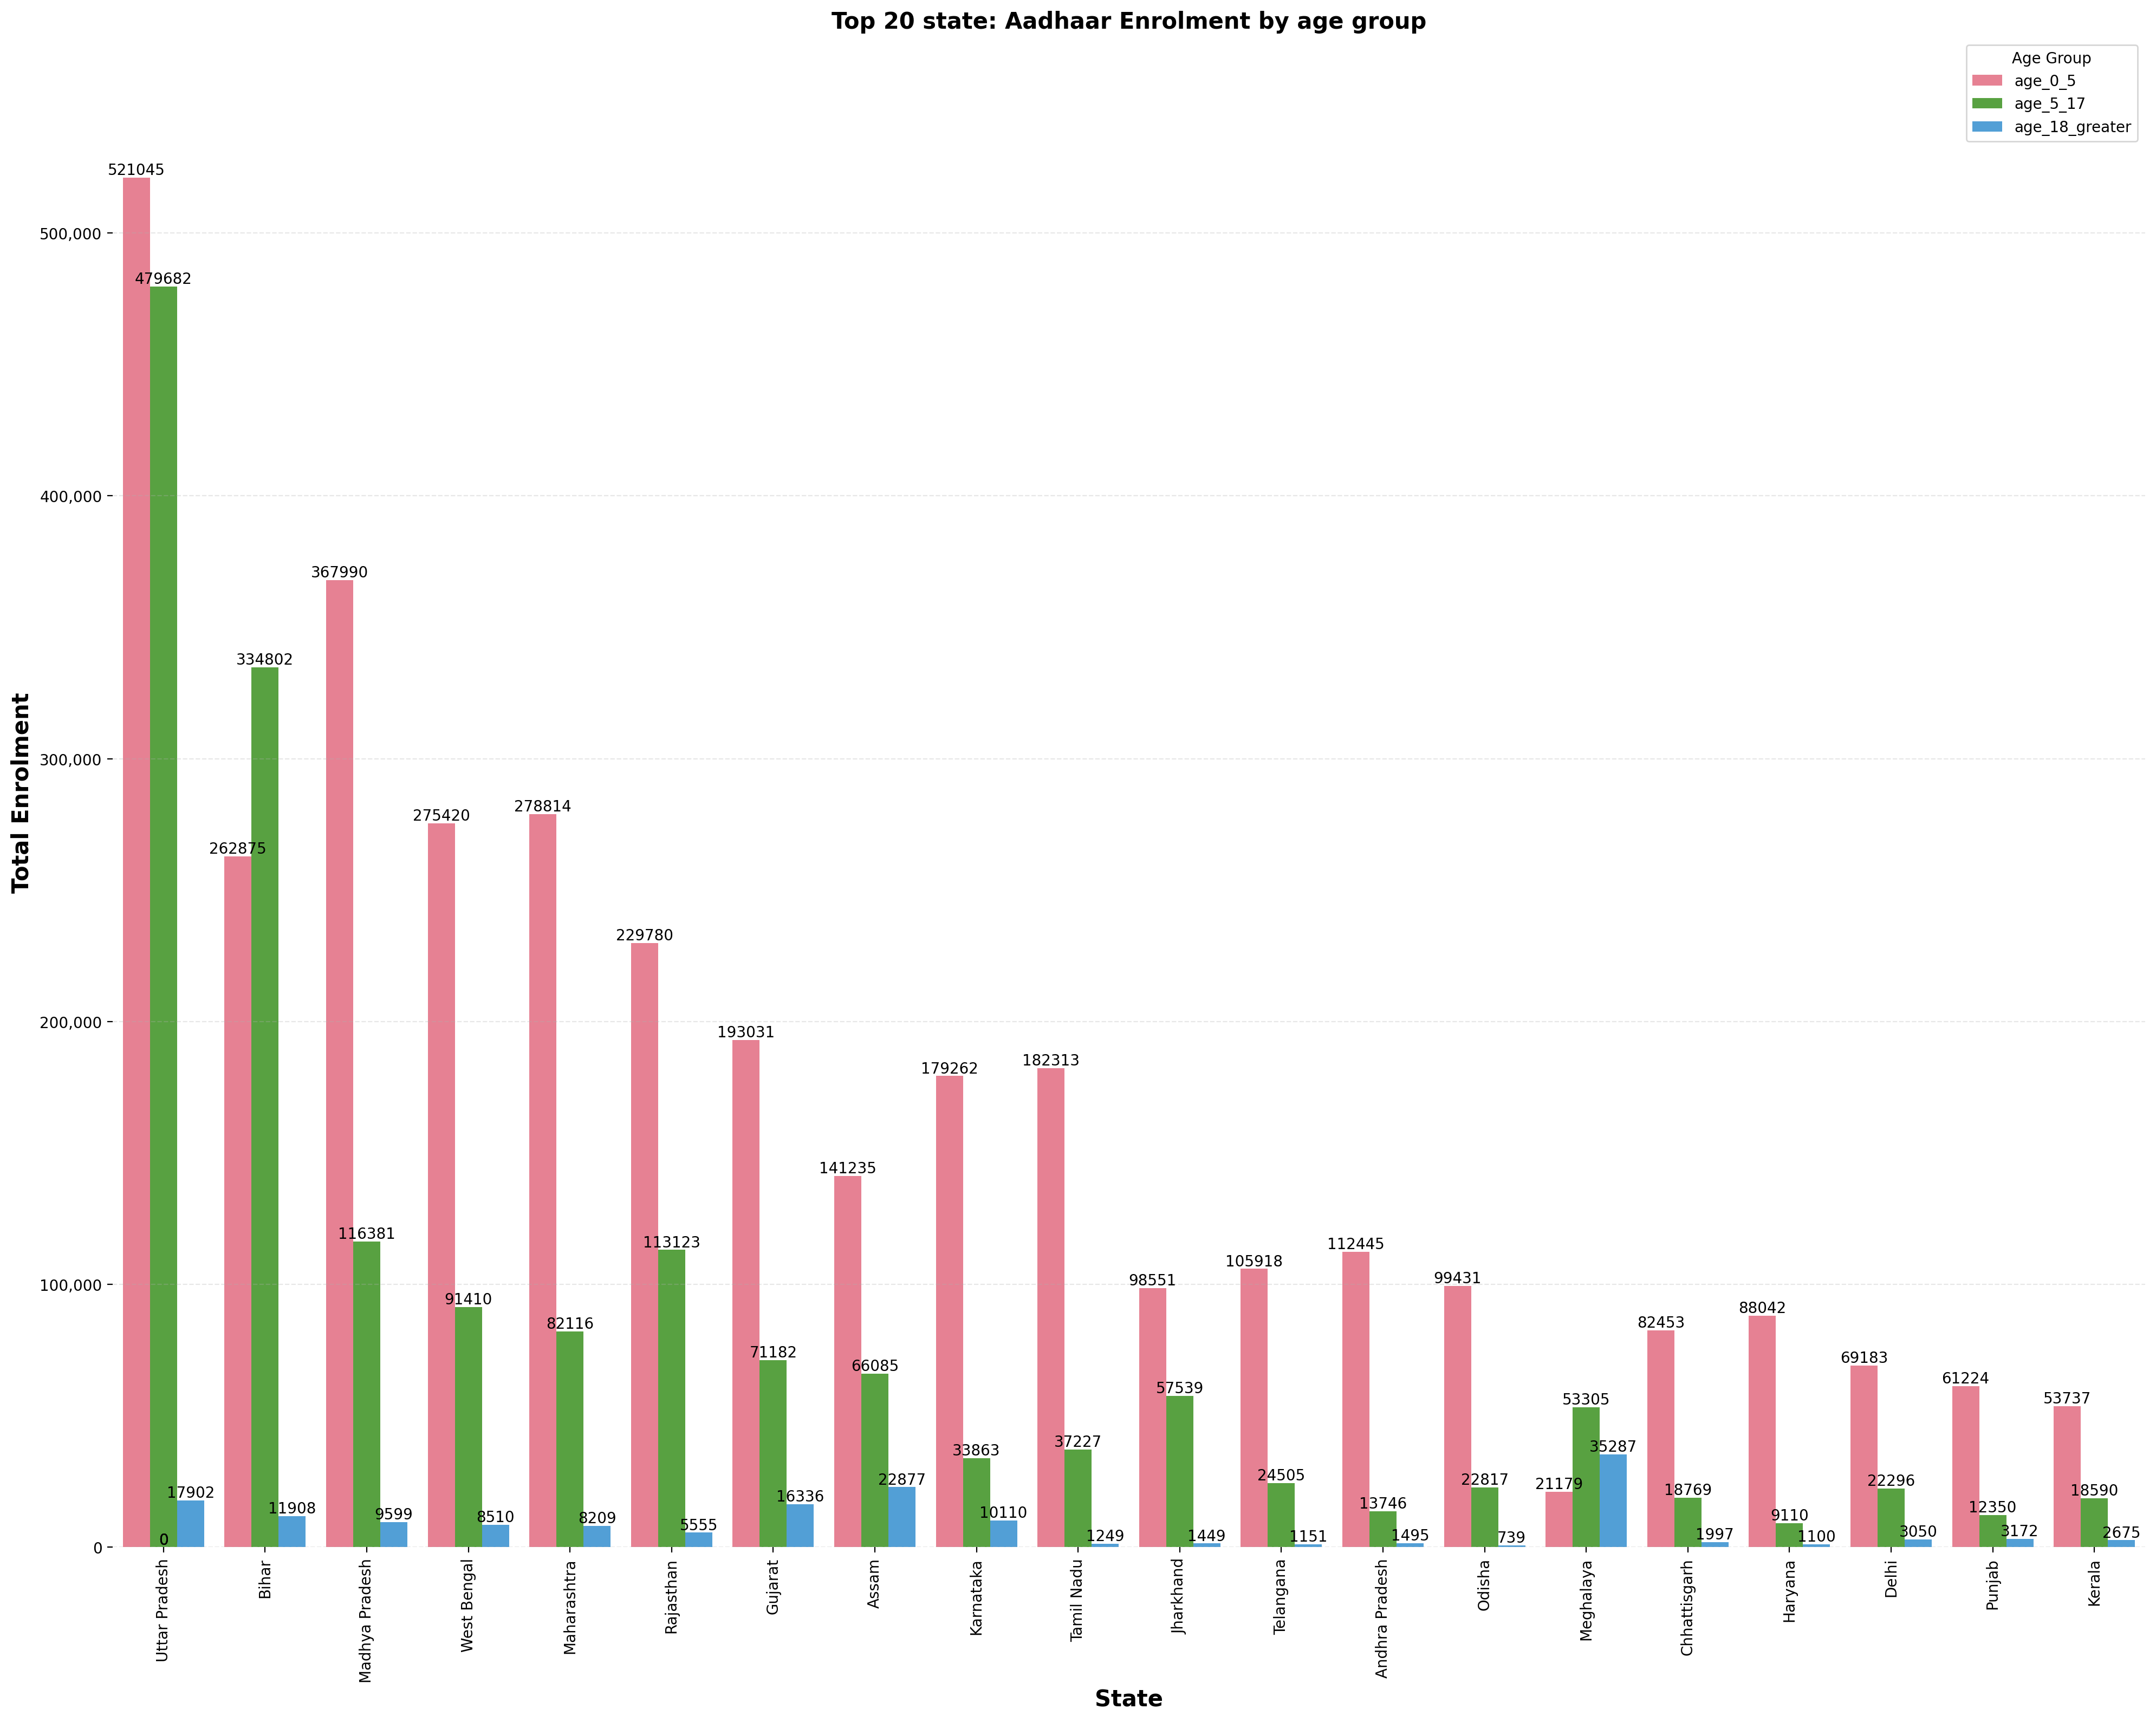

In [ ]:
# State x Age Group Enrollment Pattern
plt.figure(figsize=(20,16), dpi=200)
ax4 = sns.barplot(data=total_agg_melt,x='state',y='Enrolment',hue='Age Group',palette='husl')
ax4.set_title('Top 20 state: Aadhaar Enrolment by age group',fontsize=15,weight='bold')
ax4.set_xlabel('State',fontsize=15,weight='bold')
ax4.set_ylabel('Total Enrolment',fontsize=15,weight='bold')
ax4.grid(axis='y',linestyle='--',alpha=0.3)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
for p in ax4.patches:
            ax4.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
ax4.set_ylim(0, ax4.get_ylim()[1] * 1.05)
plt.tight_layout()
plt.savefig('BV_analysis_Top20_states_AA_EN_AG_statexage_group')
plt.show()

## **State x Age Group Enrollment Pattern**
---
### **Chart Description :**
The stacked barchart shows how each age group in states differ and the top 20 states in the enrollment

---


### **Insights :**
* Uttar Pradesh and Bihar have the greatest Aadhaar enrolments by age group as it indicates that these are the two states with immense population and demand of Aadhaar services.
* The number of children at 0-5 age bracket is very high in most states and particularly in UP, Bihar, Madhya Pradesh and Rajasthan, this implies that a large number of children are now enrolled.
* These states have a similar high figure of 5-17 years and this indicates that children of school-going age are constantly updating their biometrics.
* The number of people over the age of 18+ is low in the majority of states, and it means that these adults already possess Aadhaar and visit to update it.
* The Southern states such as Tamil Nadu, Karnataka, Telangana and Kerala have fewer child enrolments but adult-updates which are consistent, i.e. Aadhaar is already fully established in them.

---


### **Administrative Importance :**
* More Aadhaar enrolment centres in schools and in villages should be introduced in states where there are high numbers of child and youth enrolments.
* The high population states such as UP and Bihar would be provided with additional staff and biometric machines to cope with the huge workload.
* States with more adult enrolments would need to concentrate on more expeditious update services like address and biometric repair.
* The mobile Aadhaar vans must be dispatched to the busy areas and regions of migration so that the people do not have to go far.
* The government is advised to strategize Aadhaar services according to the state requirements and according to the age groups rather than just design it as a system-wide system.


In [ ]:
total['date'] = pd.to_datetime(total['date'])
if 'month' not in total.columns:
    total['month'] = total['date'].dt.month
if 'year' not in total.columns:
    total['year'] = total['date'].dt.year
month_group = total.groupby(['year', 'month'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
month_group['total_enrollment'] = month_group.sum(axis=1)
month_group = month_group.reset_index()

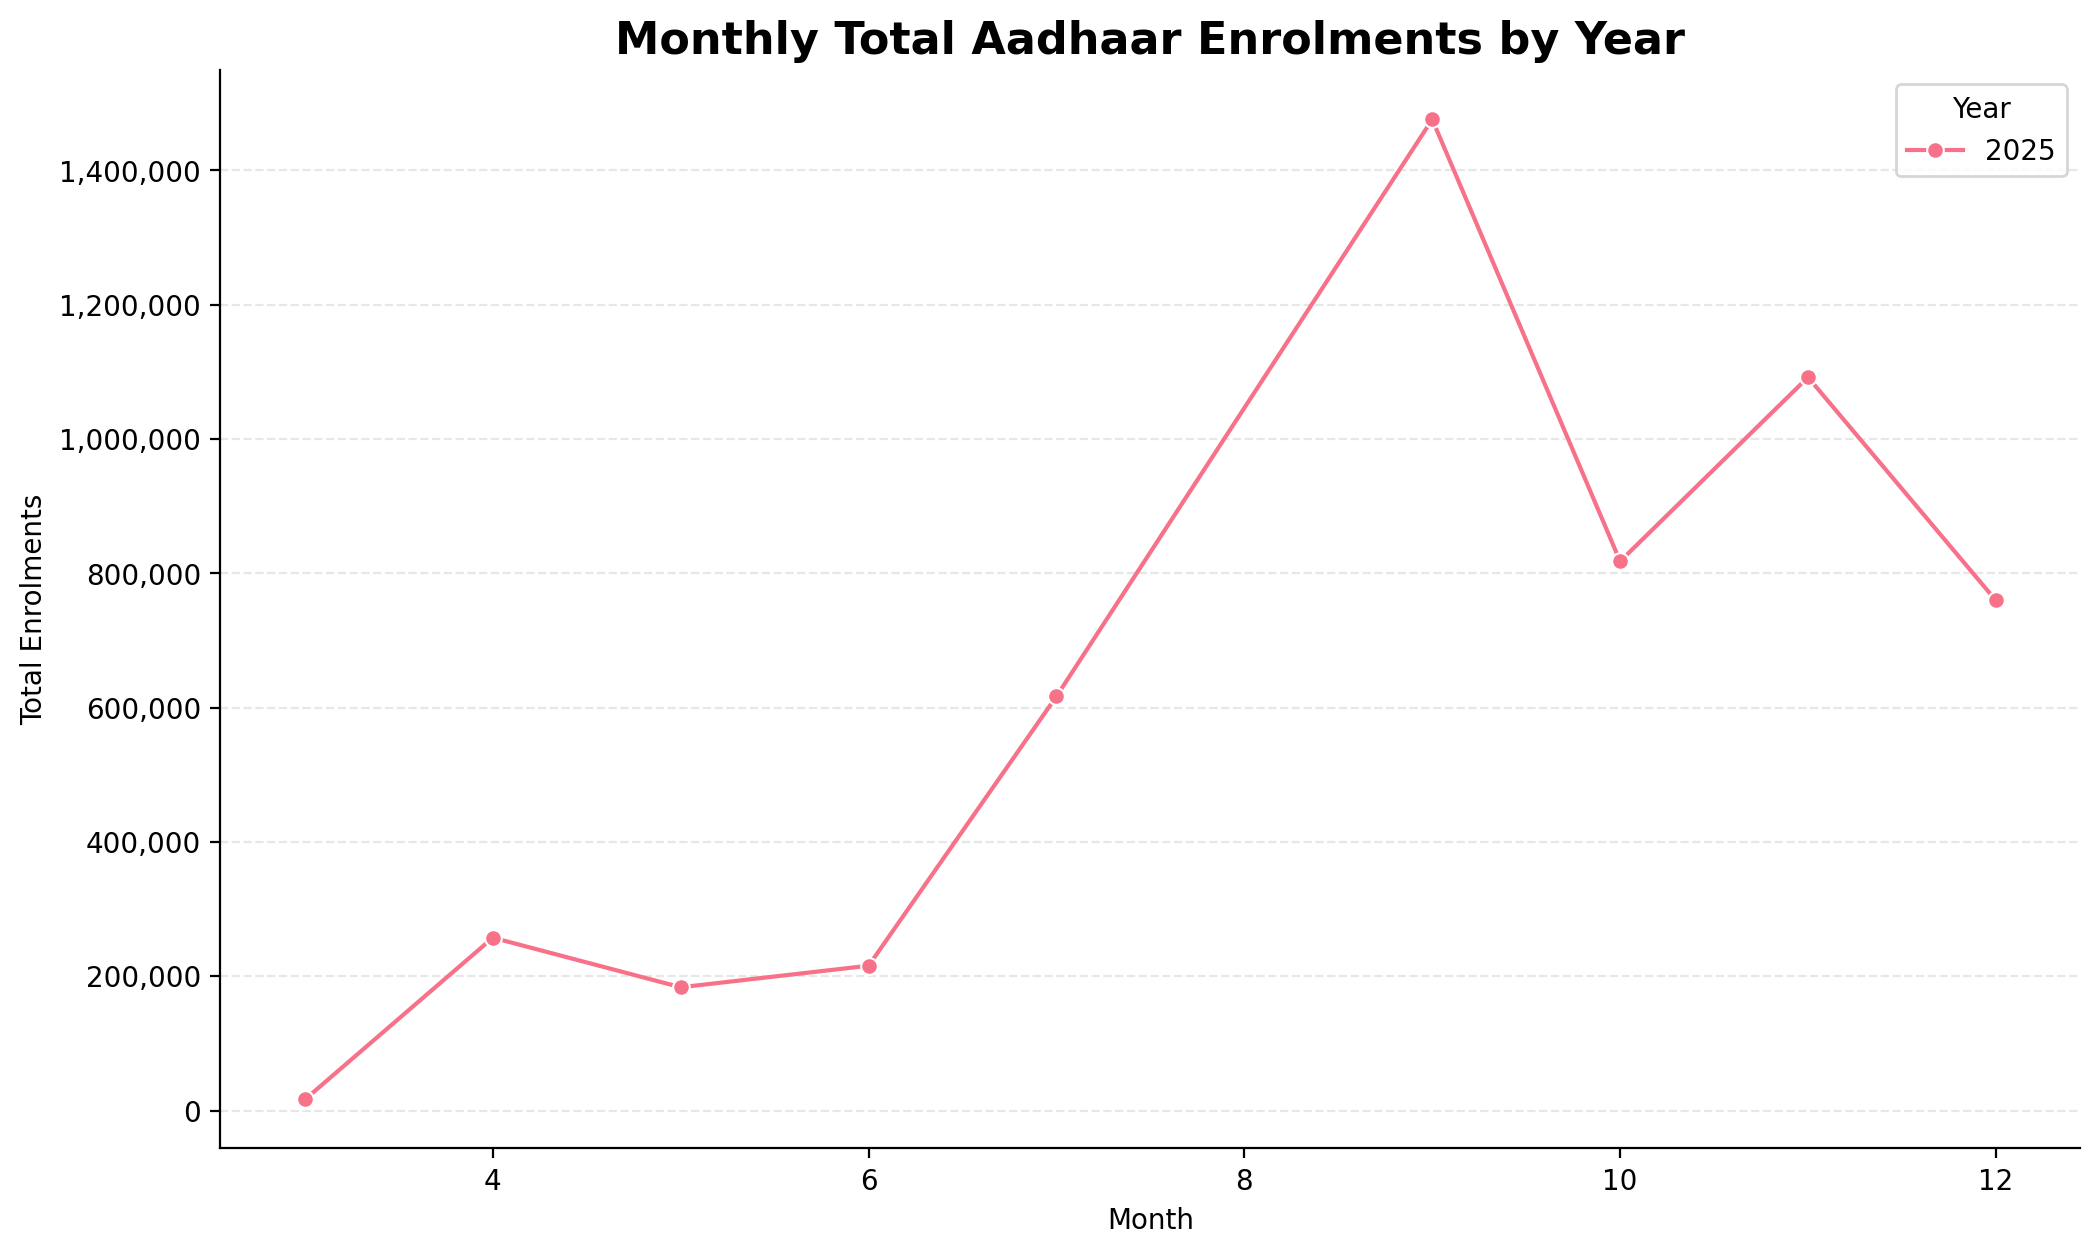

In [ ]:
# Monthly Total Aadhaar Enrollments
plt.figure(figsize=(12, 7), dpi=200)
ax5 = sns.lineplot(data=month_group, x="month", y="total_enrollment", hue="year", marker='o', palette='husl')
ax5.set_title('Monthly Total Aadhaar Enrolments by Year', fontsize=16, weight='bold')
ax5.set_xlabel('Month')
ax5.set_ylabel('Total Enrolments')
ax5.legend(title='Year')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("BV_analysis_Monthly_Total_AA_EN_by_year")
plt.show()

## **Chart Description :**
* This chart presents the month-wise trend of Aadhaar enrolments, highlighting significant variability in enrolment activity across the year.
### **INSIGHTS :**

* The enrolment in Aadhaar is very seasonal with high peaks towards the later months of the year showing demand induced by external factors, than by natural, steady growth.

* Peak-month enrollments are several times greater than the base months, which demonstrates that there is an extreme level of volatility in system-loading.

* This type of spike in demand will probably be the result of policy deadlines, cycles on welfare scheme enrolment, yearly academic updates, or changes in address due to migration.

* The fact that there has been a similar sustained but less enrollment volumes between peak months implies that core Aadhaar demand is more or less stable and surges are of an event-driven nature.

* With no pre-thinking, these peaks are highly dangerous of bottlenecks in service, latency in the system, as well as a quality of user experience.

### **Administrative (Strategic and Operational) Action :**

* Replacing the unchanging yearly planning with an anticipation model based on the calendar to establish alignment of the personnel and structures with anticipated peak of activities.

* Pre-scale enrolment infrastructure (operators, biometric devices, backend capacity) 4-6 weeks to expected spikes.

* Additional surging capacity by altering holiday months: use temporary surge capacity, mobile addition of new enrollment capacity and extending operating hours.

* System upgrades, data verification, operator training and process audits should be done during low-demand months to enhance the quality of service in the long term.

* Make demand control dashboards monthly to enable timely response to the approach of an enrollment burst.

In [ ]:
state_daily = total.groupby(['state', 'date'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
state_daily['total_enrollment'] = state_daily.sum(axis=1)
avg_daily = state_daily.groupby('state')['total_enrollment'].mean().sort_values(ascending=False).head(10).reset_index()

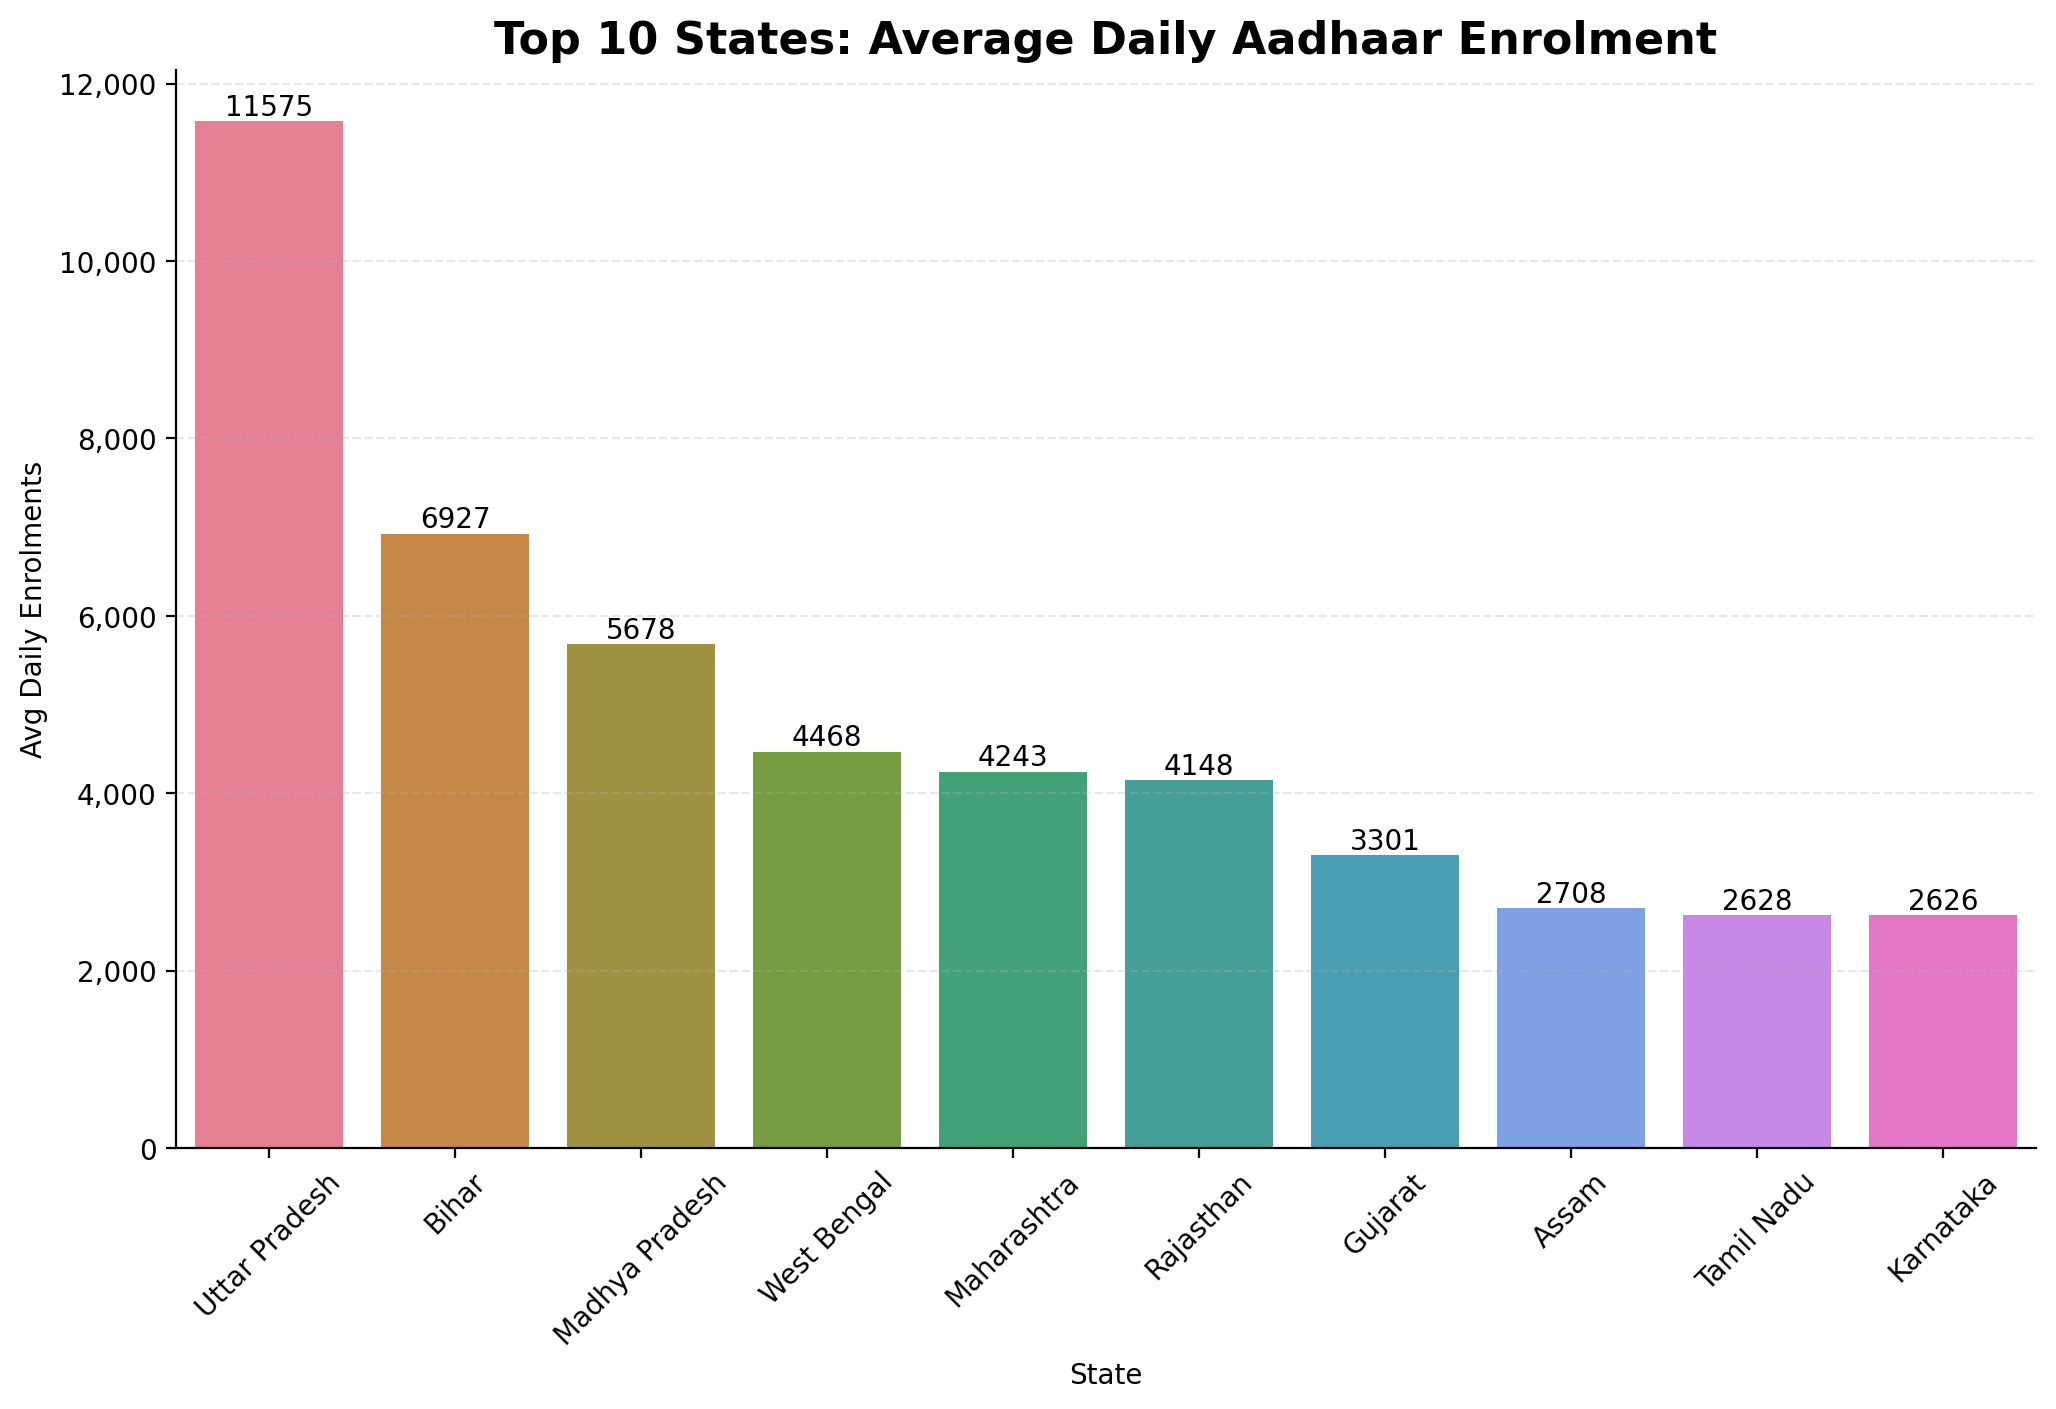

In [ ]:
# Average Daily Aadhaar Enrollment in States
plt.figure(figsize=(12, 7), dpi=200)
ax6 = sns.barplot(data=avg_daily, x='state', y='total_enrollment', palette='husl')
ax6.set_title('Top 10 States: Average Daily Aadhaar Enrolment', fontsize=16, weight='bold')
ax6.set_xlabel('State')
ax6.set_ylabel('Avg Daily Enrolments')
sns.despine()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
for p in ax6.patches:
            ax6.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
ax4.set_ylim(0, ax6.get_ylim()[1] * 1.05)
plt.savefig("BV_analysis_Top10_states_AA_EN_avg_daily")
plt.show()

### **Chart Description:**

* This chart presents the top 10 states based on average daily Aadhaar enrolments, capturing sustained operational demand rather than one-time spikes.

### **INSIGHTS :**

* The average daily enrolment in Uttar Pradesh is approximately twice that of the next state signifying chronic operational pressure rather than demand.

* The state of Bihar has shown to have high daily figures implying that Aadhaar services have been incorporated in daily administrative procedures as well as welfare procedures.

* The sharp drop following the top two states indicates that it is mostly the concentration of Aadhaar demand that is highly centralized with most states having much lower daily loads.

* The demand in middle-tier states (Madhya Pradesh, West Bengal, Maharashtra, Rajasthan) is stable and manageable, the best fit in optimized staffing.

* Southern state enrolments that are lower daily also reflect the mature Aadhaar penetrations, with the demand lowly based on updates and not on new-enrolments.

* Average daily enrolment exposes some work load realities that cannot be depicted by total enrolment figures alone.

* States that have low numbers coming in daily might have idle infrastructure, whereas states that have high demand rates may end up dealing with staff burnouts and delays in services.

### **ACTIONS :**

* Making average daily enrolment a key KPI in Aadhaar infrastructure planning and budgeting.

* Install increased operator strength and biometric equipment permanently in a state with a continuous high demand of day.

* Present the levels of operation models:

    * The states with high demand - increased working hours and counters.

    * In the medium demand category - optimal staffing.

    * The conditions that are low-demand, such as shared/mobile resources.

* Facilitate resource redeployment between the states and so that trained operators can be temporarily moved to high-demand times.

* Use rolling daily averages to predict points of trouble by maintaining predictive demand by monitoring.

* Optimize low-demand states with centres consolidation and concentrating on appointment-based update services.

* Credential day-to-day demand information so as to minimize waiting, enhance service quality and operational inefficiencies.

# **Trivariate Analysis**

In [ ]:
# State x Month x Age group(Heatmap)
total['month'] = total['date'].dt.month
top_states = (
    total.groupby('state')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)
filtered = total[total['state'].isin(top_states)]
pivot_state_month = (
    filtered
    .groupby(['state','month'])['total_enrollment']
    .sum()
    .reset_index()
    .pivot(index='state', columns='month', values='total_enrollment')
)
pivot_state_month = pivot_state_month.loc[
    pivot_state_month.sum(axis=1).sort_values(ascending=False).index
]


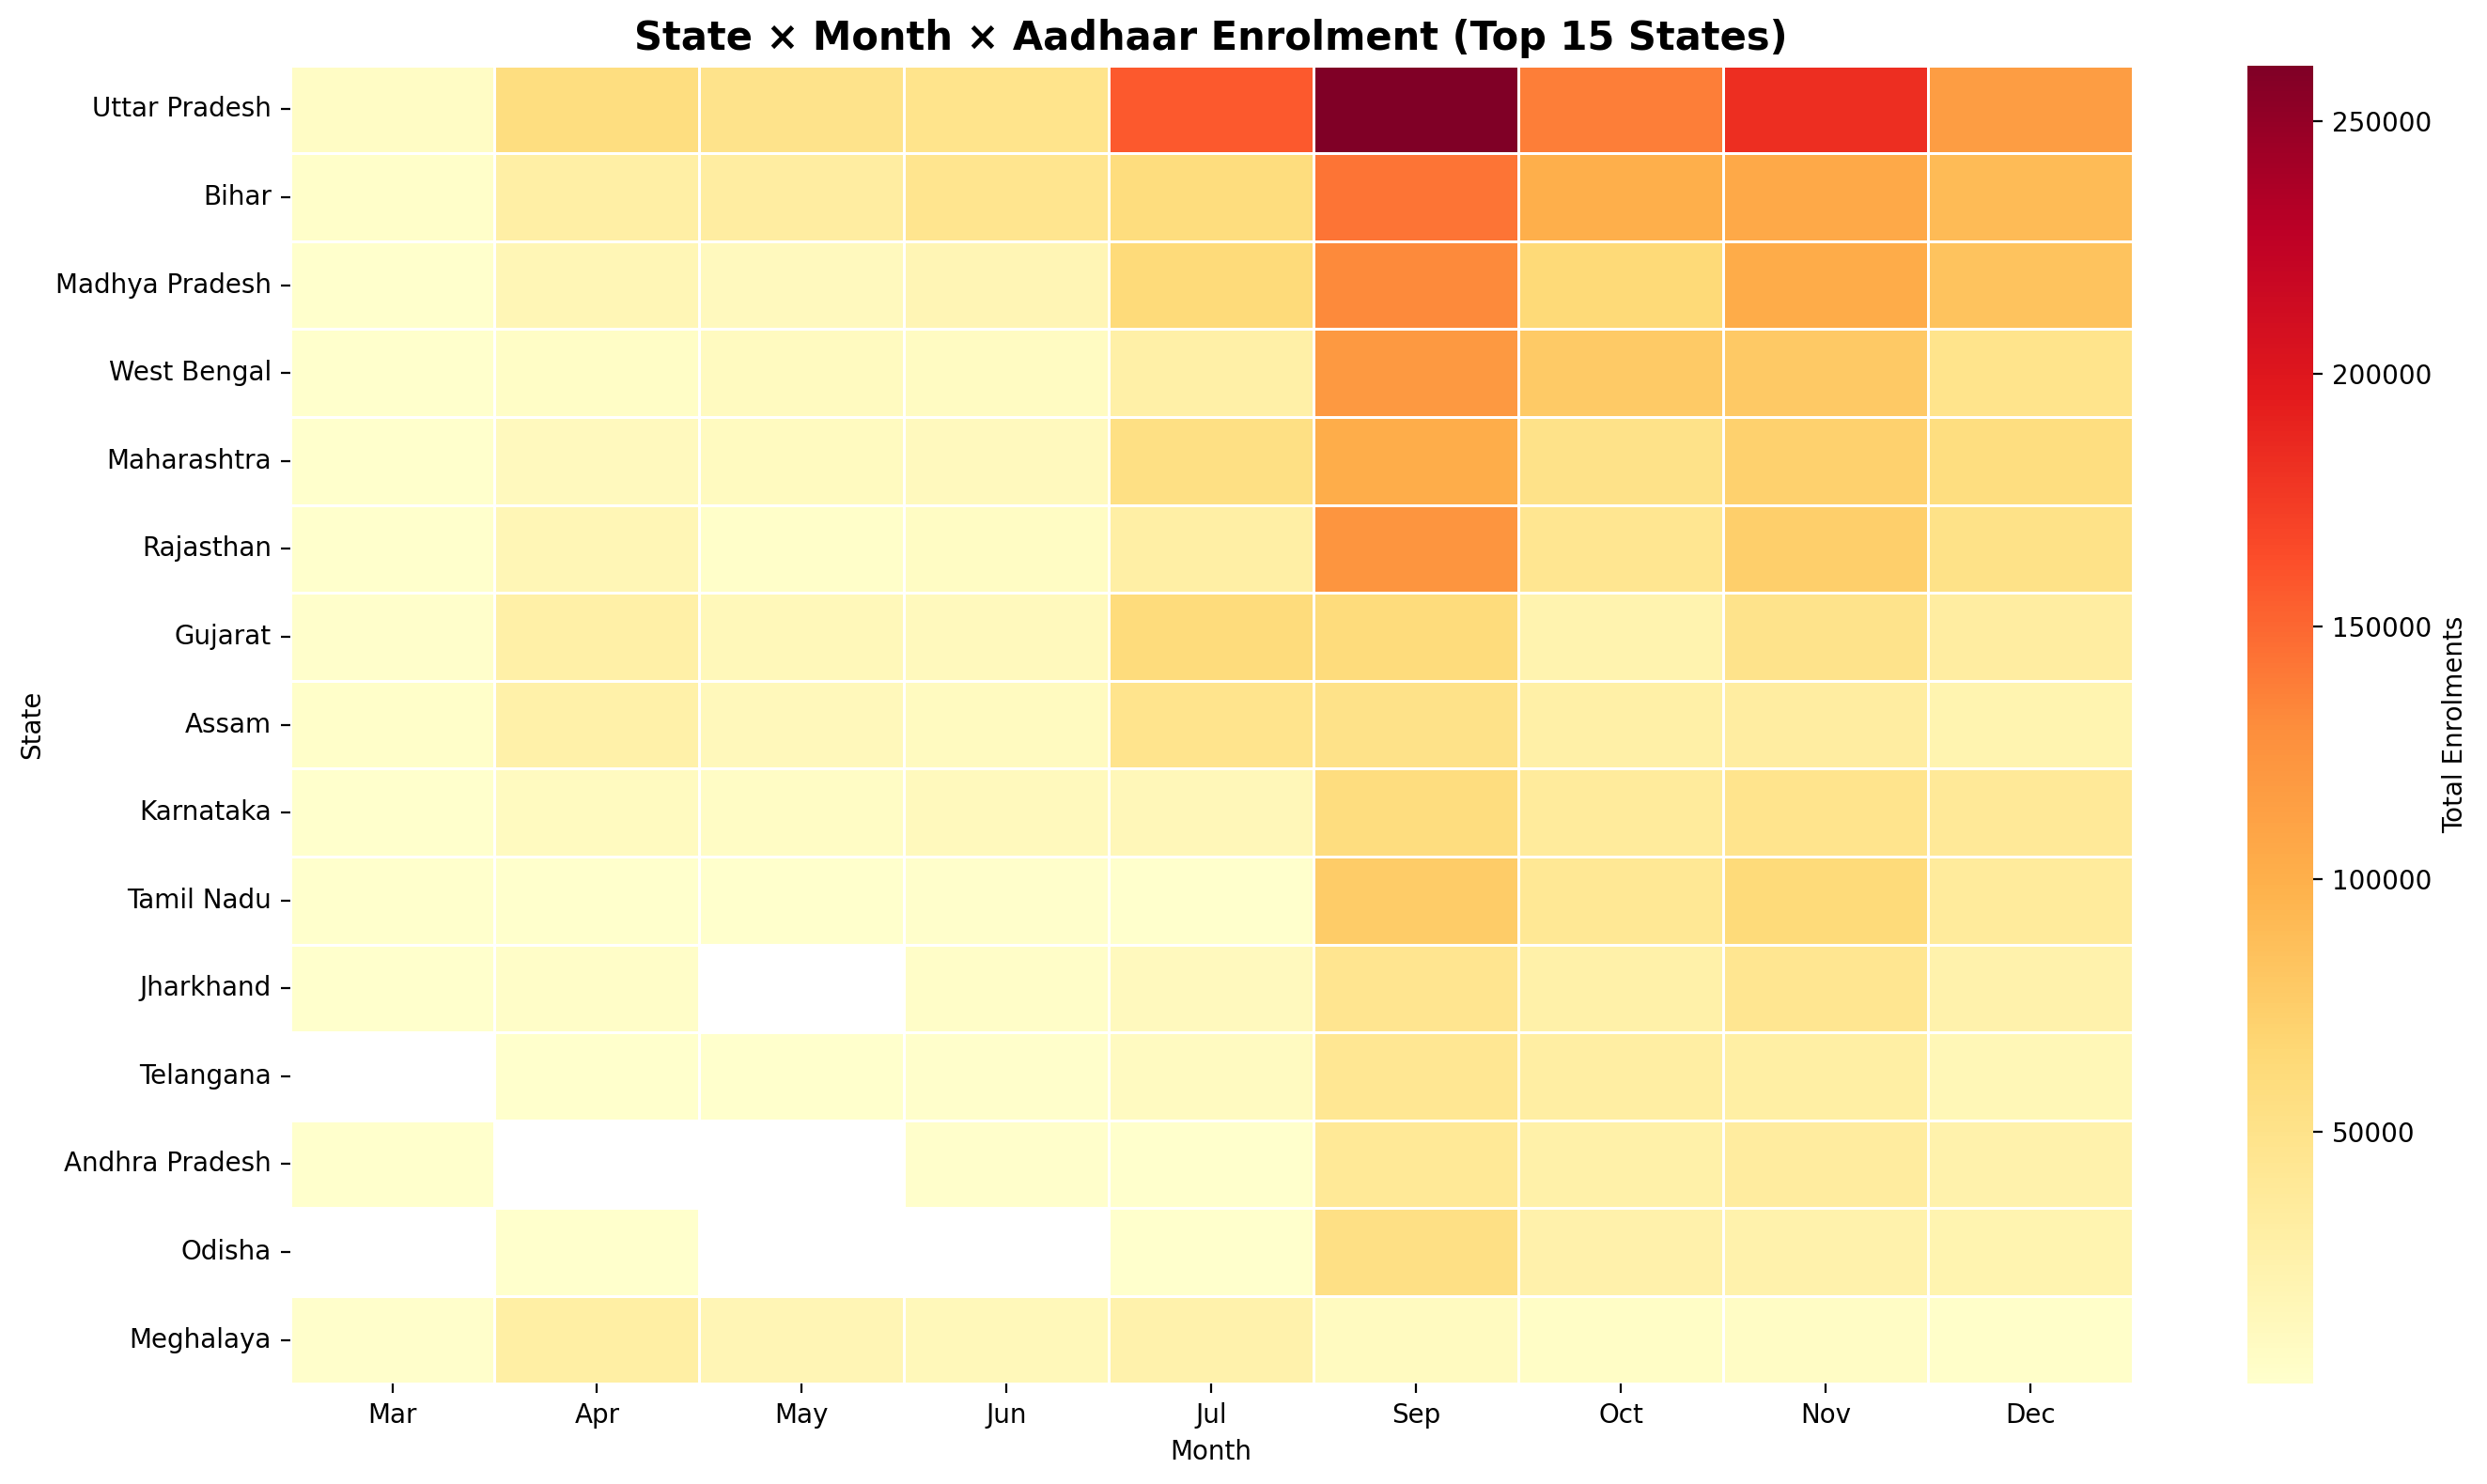

In [ ]:
plt.figure(figsize=(14,8), dpi=200)

ax = sns.heatmap(
    pivot_state_month,
    cmap='YlOrRd',
    linewidths=0.4,
    cbar_kws={'label': 'Total Enrolments'}
)

plt.title('State × Month × Aadhaar Enrolment (Top 15 States)', fontsize=15, weight='bold')
plt.xlabel('Month')
plt.ylabel('State')
ax.set_xticklabels(
    ['Mar','Apr','May','Jun','Jul','Sep','Oct','Nov','Dec'],
    rotation=0
)

plt.tight_layout()
plt.savefig("TV_analysis_State_Month_AA_EN_top15")
plt.show()

# **State x Month x Age group(Heatmap)(Trivariate)**
### **Chart Description :**
* This heat map indicates the number of enrolments with Aadhaar in the 15 leading states over the months indicating that the level of enrolment is varying with the states and the months.
* Darker shades indicate greater enrolments, so seasonal and regional hotspots can be easily determined.
### **Insights :**
* There is also no equal distribution of Aadhaar enrolments across months, with majority of states depicting a clear growth in the last half year.
* The months of September through November turn out to be the most successful enrolment months in several populated states.
* The highest volumes of enrolment are always registered in Uttar Pradesh particularly during peak months, which implies continued demand.
* Other states such as Bihar, Madhya Pradesh, Maharashtra and West Bengal have high seasonal spikes however with weaker intensity.
* Smaller states and UTs (e.g. Meghalaya, Odisha) have less and less variable enrolment, with little seasonality.
* The trend indicates enrolment spurts to be event-based (welfare plans, deadlines, college cycles) instead of yearly demand.
### **Actions:**
* Enroll more centres, operators and biometric kits in the high demand states in the peak months (September-November).
* Ramp-up must start at least one month before the periods of expected peak to prevent congestion of the services.
* Implement mobile enrolment units in those states that are characterized by steep seasonal spikes to deal with the transient demand.
* Staff training, which seeks to maintain a system and ensure data quality, is done using low-enrolment months.
* Implement state specific enrolment schedules rather than a national model of deployment.
* Watch monthly trends so to be able to plan proactively instead of acting in response.

In [ ]:
total.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_enrollment', 'invalid_geo', 'month', 'year'],
      dtype='object')

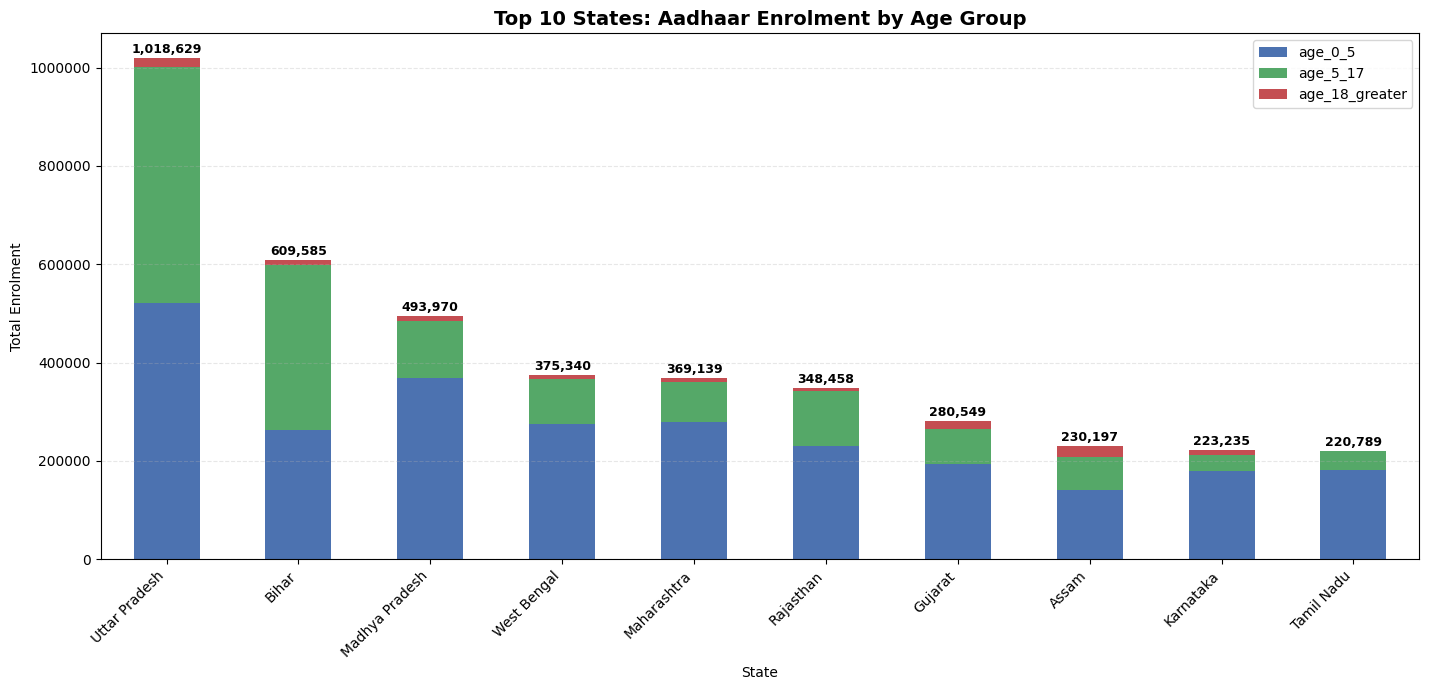

In [ ]:
# State x Aadhaar Enrollment x Age group(Stacked Bar Graph)
state_age = (
    total
    .groupby('state')[['age_0_5','age_5_17','age_18_greater']]
    .sum()
)
state_age['total_enrollment'] = state_age['age_0_5'] + state_age['age_5_17'] + state_age['age_18_greater']

state_age = state_age.sort_values(by='total_enrollment', ascending=False).head(10)

ax7 = state_age[['age_0_5','age_5_17','age_18_greater']].plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    color=['#4C72B0', '#55A868', '#C44E52']
)

plt.title('Top 10 States: Aadhaar Enrolment by Age Group', fontsize=14, weight='bold')
plt.xlabel('State')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
for i, total_val in enumerate(state_age['total_enrollment']):
    plt.text(i, total_val + 10000, f'{total_val:,.0f}',
             ha='center', fontsize=9, fontweight='bold')
plt.savefig("TV_analysis_Top10_states_AA_EN_age_group")
plt.show()

# State x Aadhaar Enrollment x Age group(Stacked Bar Graph)(Trivariate Analysis)
### **Chart Description:**

* The chart figures indicate the total Aadhaar enrolment of the top 10 states in terms of age (0-5, 5-17 and 18+).
* It assists in knowing the age groups that lead to enrolment in high performing states.

### **Insights :**

* The 0-5 years age is the highest age in enrolment of all the top states, which implies good Aadhaar enrolment among the newborns and children.

* Clearly outstanding is Uttar Pradesh and Bihar which are mainly triggered by high numbers of child and adolescents.

* Adult (18+) enrolments are relatively small, and that is likely Aadhaar covered among adults is mostly saturated.

* Such states as Maharashtra and West Bengal have equal distribution, which is a result of stable enrolment for the different age groups.

* States which are in the South (Tamil Nadu, Karnataka) are at lower totals indicating low fertility and high Aadhaar maturity.

### **Actions:**

* Intensify the Aadhaar enrolment with hospital, anganwadi, and school enrolment in states with high child population.

* Devise age-based plans of enrolment rather than state-wide plans.

* Change the present orientation of the shift operation in developed states toward update services (biometrics, address, mobile).

* Trends in child enrolments can be used to forecast demand in future Aadhaar updates in the next 10 years.

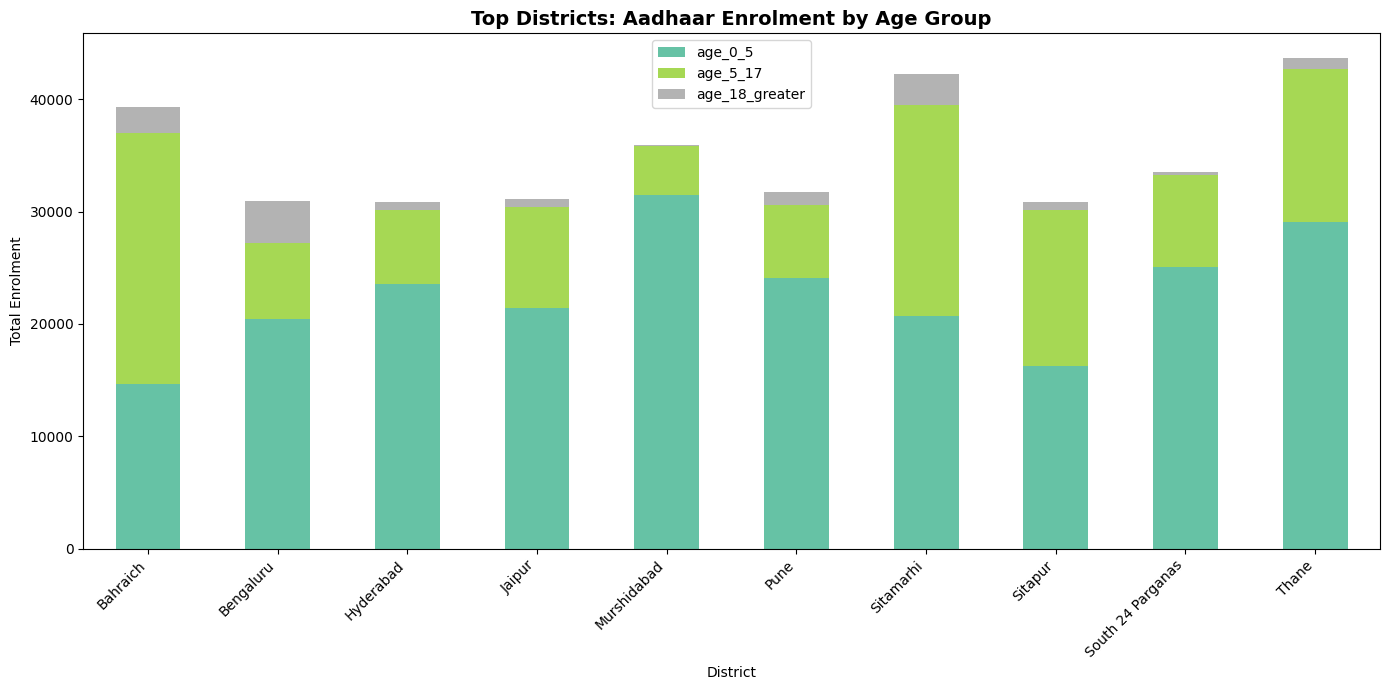

In [ ]:
# District × Age Group × Enrolment (Top Districts)
top_districts = (
    total
    .groupby('district')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

district_age = (
    total[total['district'].isin(top_districts)]
    .groupby('district')[['age_0_5','age_5_17','age_18_greater']]
    .sum()
)

district_age.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    colormap='Set2'
)

plt.title('Top Districts: Aadhaar Enrolment by Age Group', fontsize=14, weight='bold')
plt.xlabel('District')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("TV_analysis_Top10_districts_AA_EN_age_group")
plt.show()

# District × Age Group × Enrolment (Top Districts)
### **Chart Description:**

* In this chart, the enrolments in Aadhaar in the leading districts have been compared with regard to age group.
* It singles out district-level hotspots and Aadhaar demand drivers (demographic).

### **Insights :**

* There are quite high enrolment volumes in districts like Thane, Sitamarhi, Murshidabad, and Bahraich.

* The primary contributor as in most districts is child enrolment (0-5), as is the case in the state level.

* Other places (Bengaluru, Pune, Hyderabad) have moderate but stable enrolments, primarily facilitated through updates.

* The 5-17 age share is somewhat higher in some districts which suggests that there is a school-related enrolment when compared to other districts.

* The difference at the district level is far more acute than the average at the state level that shows local demand pressure.

### **Actions:**

* Enact district capacity planning, as opposed to implementing state-wide planning.

* Create mobile enrolment units on high demand districts on high seasons.

* Align Aadhaar enrolments with school admissions in enrolment hotspots districts Coordination of Aadhaar with school admissions.

* Give preference to the high-performers districts in terms of pilot use of digital or appointment-based enrolment.

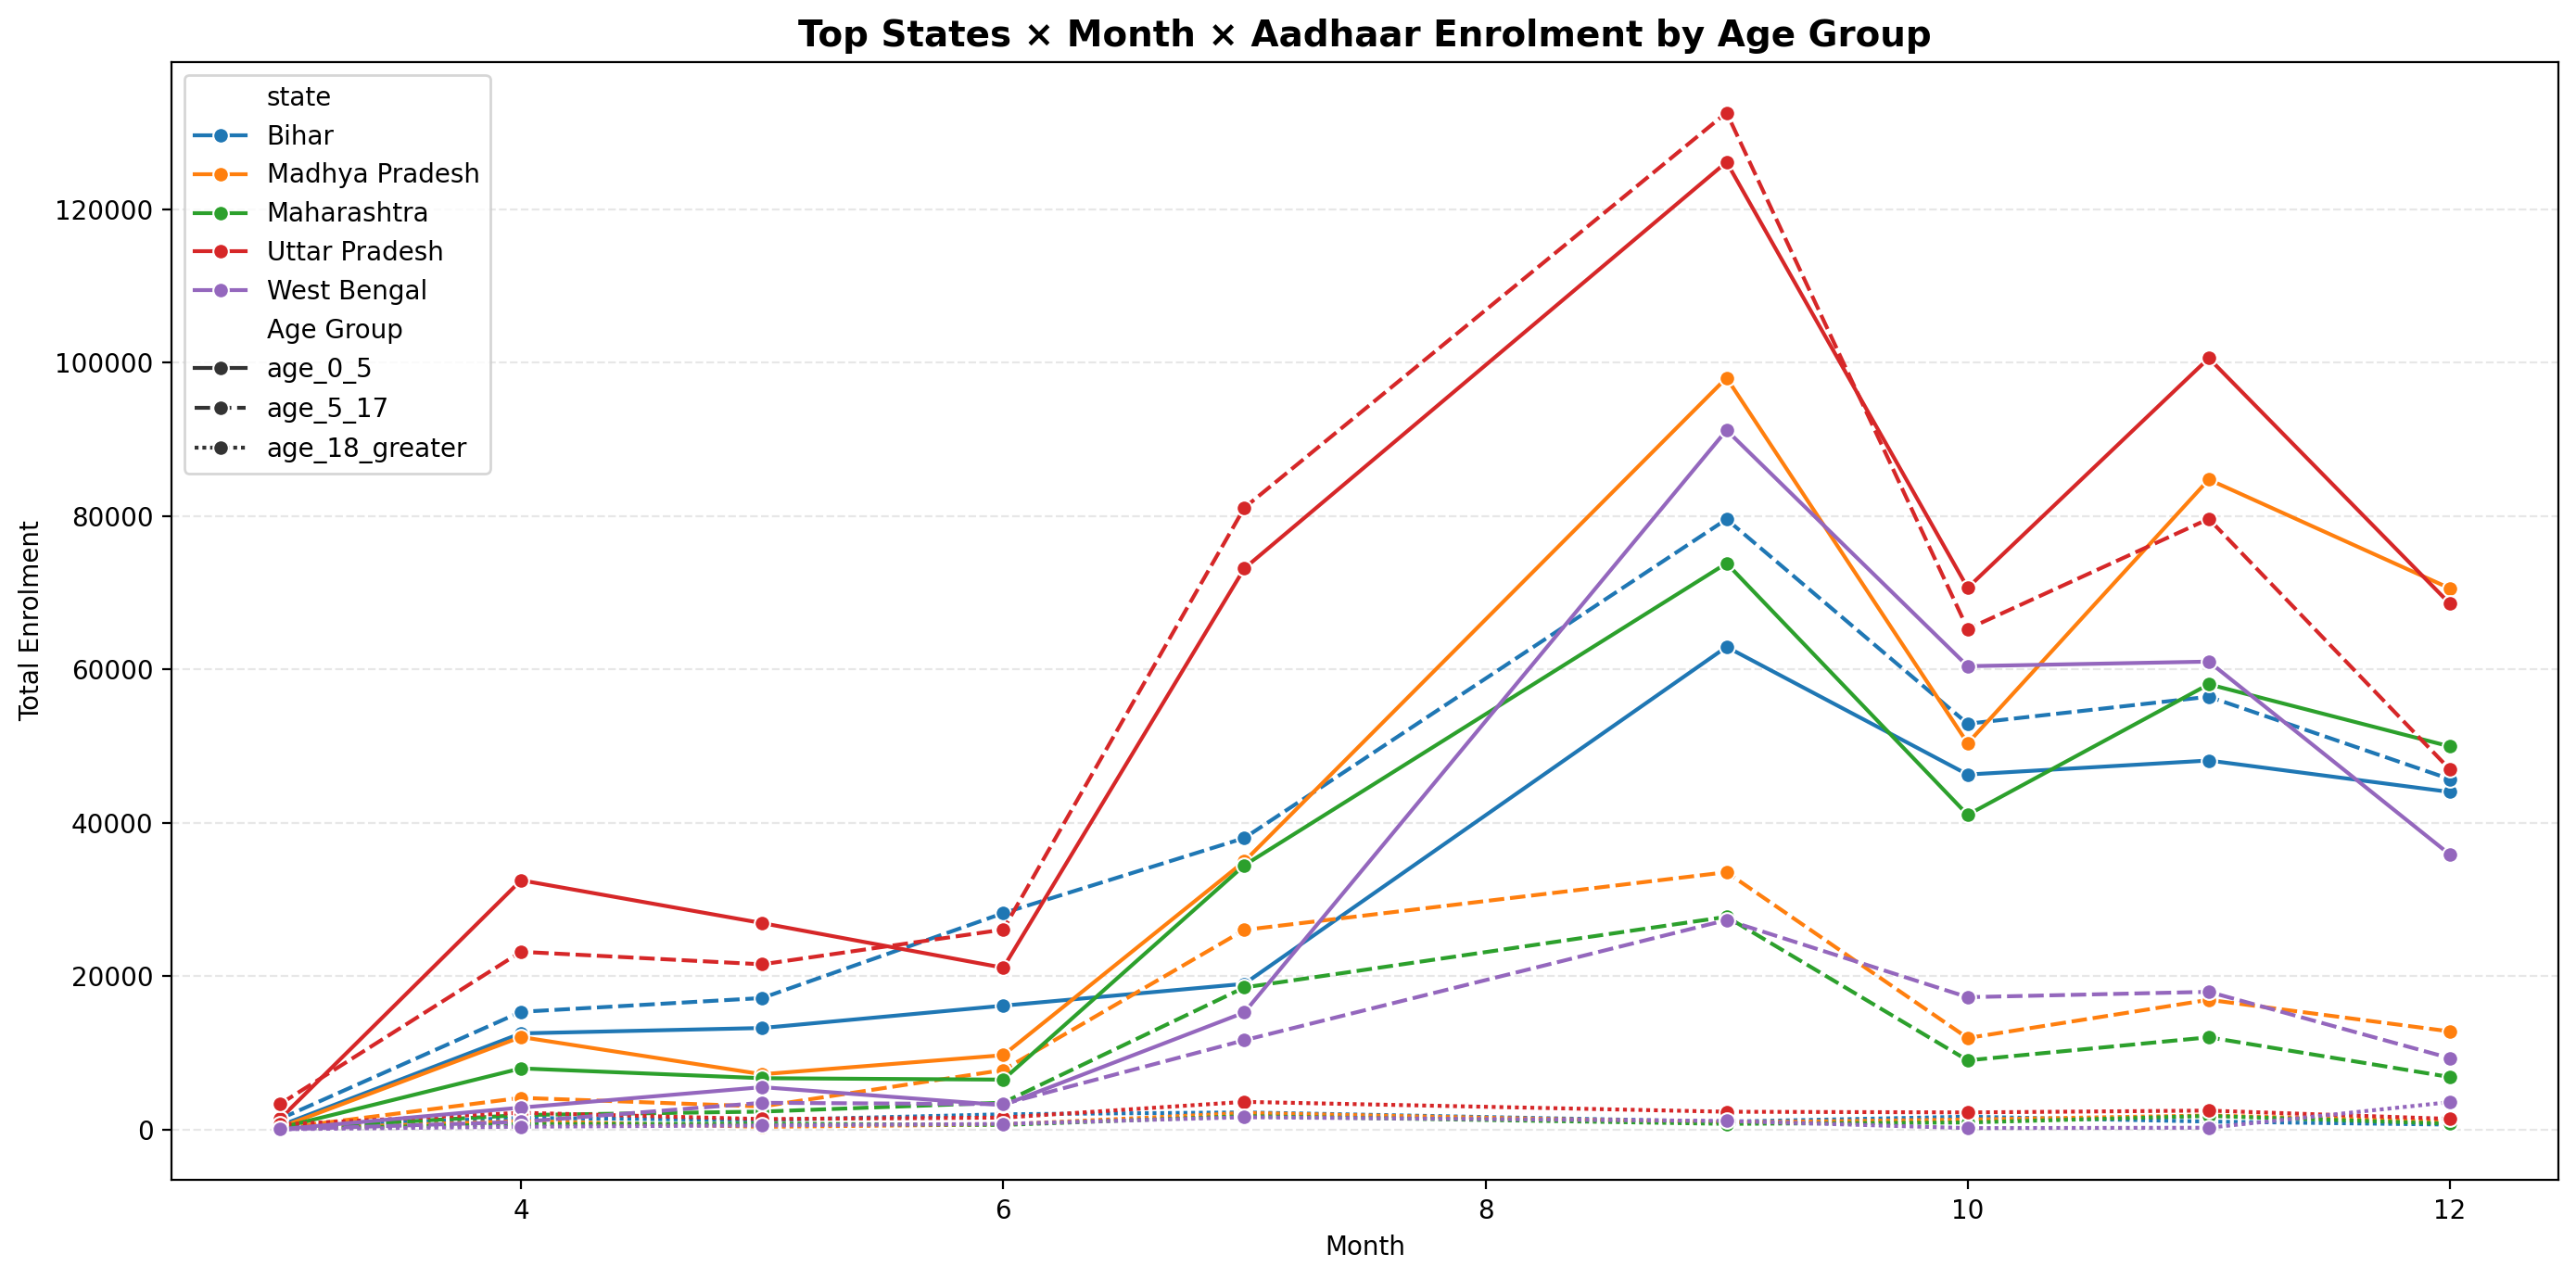

In [ ]:
# State x Month x Age Group
monthly_age = (
    total
    .groupby(['state','month'])[['age_0_5','age_5_17','age_18_greater']]
    .sum()
    .reset_index()
)

top_states = (
    total
    .groupby('state')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

filtered = monthly_age[monthly_age['state'].isin(top_states)]
filtered_melted = filtered.melt(
    id_vars=['state', 'month'],
    value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
    var_name='Age Group',
    value_name='Enrolment'
)

plt.figure(figsize=(14,7), dpi=200)
sns.lineplot(
    data=filtered_melted,
    x='month',
    y='Enrolment',
    hue='state',
    style='Age Group',
    marker='o'
)

plt.title('Top States × Month × Aadhaar Enrolment by Age Group', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Total Enrolment') # Update y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("TV_analysis_Top5_states_AA_EN_age_group_month")
plt.show()

# State x Month x Age Group(Line Chart)(Trivariate Analysis)
### **Chart Description:**
* This graph monitors the trends of monthly Aadhaar enrolment of the leading states by their age group.
* It displays the time-dependent fluctuation in enrolment demand as well as the variation according to the regions and age.

### **Insights :**

* Spike in enrolment between July and November is observable in all the major states.

* Uttar Pradesh always achieves the greatest number of enrolment monthly, particularly in children.

* The seasonal trend is observed in all the age groups but most in 0-5 and 5-17 groups.

* Adult enrolments are not very high but stable all year round boosting Aadhaar saturation.

* The same peak trends across the states imply triggers triggers of policies or welfare on a national scale.

### **Actions:**

* Pre-plan scale surge anticipating predictable seasonal surge to July before July.

* Additional staffing, working hours, and Biometric kits in July-November.

* Train, audit and upgrade the system at the beginning of the year.

* Bring predictive dashboard with monthly trends to change the reactive planning to proactive planning.